In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the main dataset and CATE predictions
data = pd.read_csv('../../data/analysis_data/dataset.csv')
s_predictions = pd.read_csv('../../results/analysis_data_results/test_data/s_predictions.csv')
t_predictions = pd.read_csv('../../results/analysis_data_results/test_data/t_predictions.csv')
x_predictions = pd.read_csv('../../results/analysis_data_results/test_data/x_predictions.csv')
r_predictions = pd.read_csv('../../results/analysis_data_results/test_data/r_predictions.csv')
print(s_predictions.head())
print(t_predictions.head())
print(x_predictions.head())
print(r_predictions.head())

   PreInterventionFixedMindset  SchoolAchievementLevel  \
0                    -0.439024                0.638664   
1                    -0.509044               -0.245513   
2                    -0.214474                1.362762   
3                    -0.326688                1.290629   
4                     0.254433               -0.187237   

   SchoolMinorityComposition  PovertyConcentration  TotalStudentPopulation  \
0                  -0.447305             -0.134067                0.197014   
1                  -1.275983             -0.005205               -1.004449   
2                  -1.056557             -1.082470                0.348322   
3                  -0.763398             -1.160290                0.831021   
4                   1.333675             -0.307735                0.375201   

   schoolid  StudentRaceEthnicity  StudentGender  FirstGenCollegeStatus  \
0       7.0                  13.0            1.0                    1.0   
1       5.0                   4.

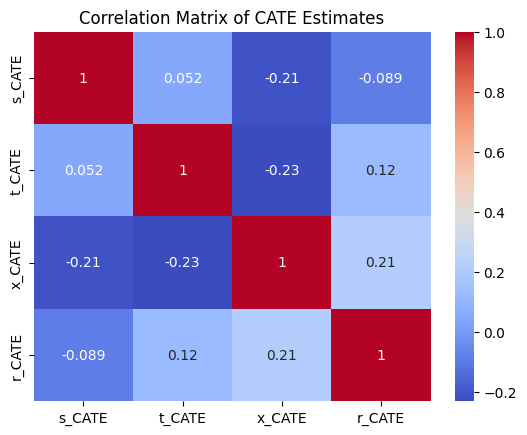

In [2]:
# Merge the predictions on a common identifier, assuming 'index' can be used
merged_data = pd.concat([
    s_predictions[['s_CATE']],
    t_predictions[['t_CATE']],
    x_predictions[['x_CATE']],
    r_predictions[['r_CATE']]
], axis=1)

# Plot correlations between different CATE predictions
corr = merged_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of CATE Estimates')
plt.show()

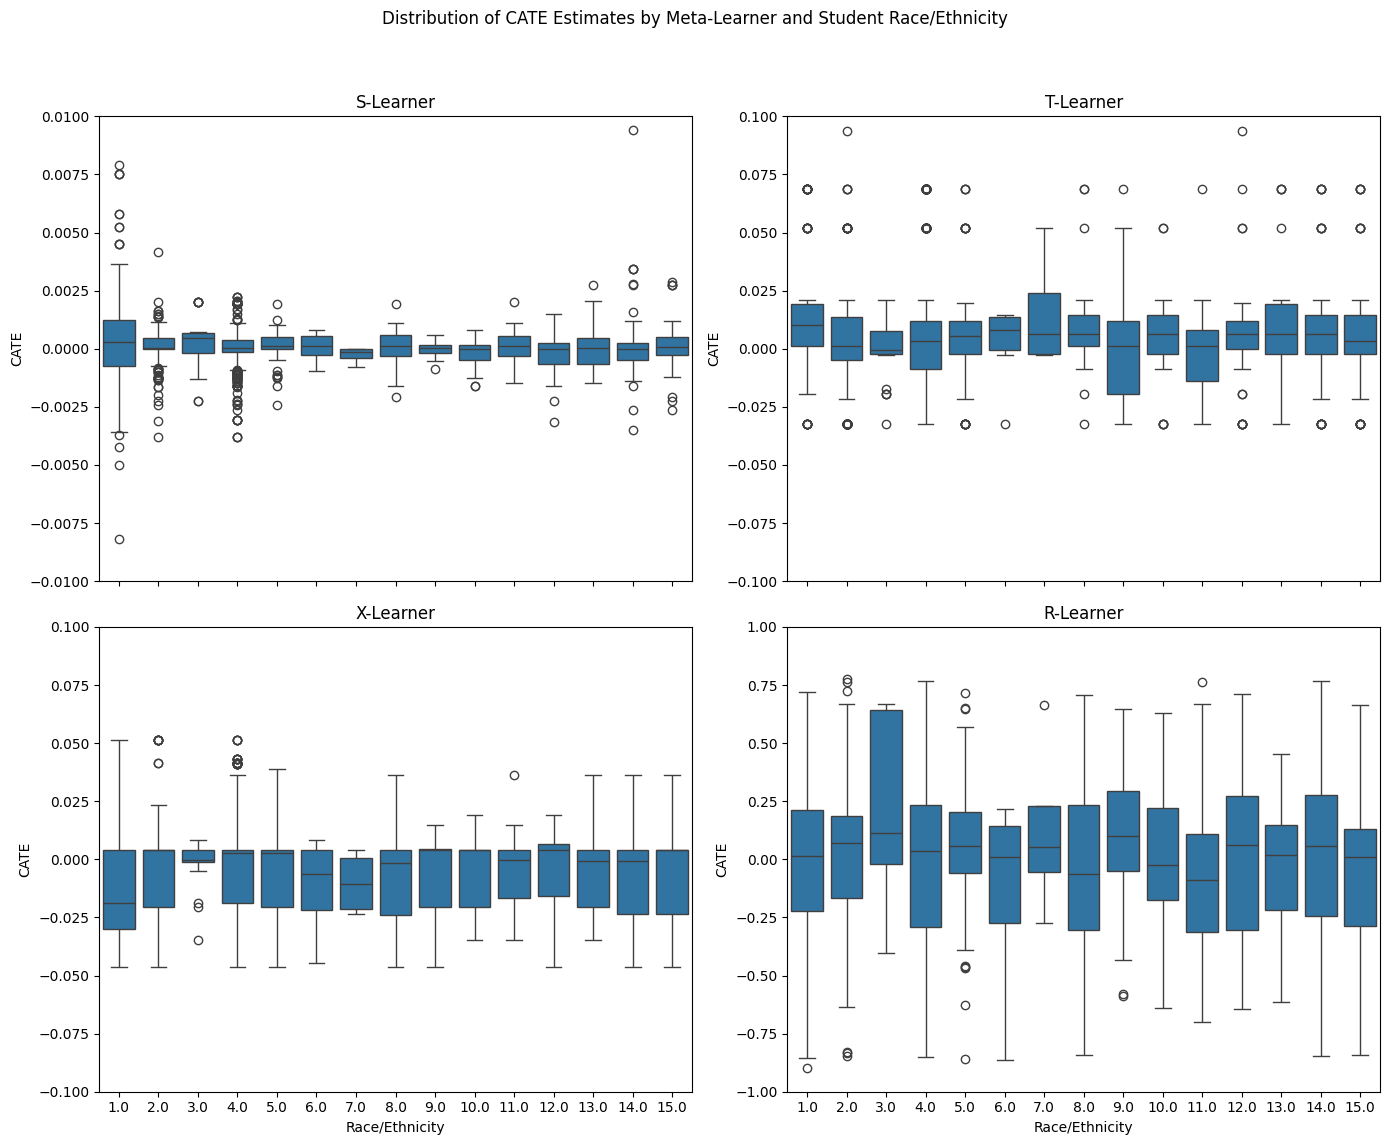

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True)
fig.suptitle('Distribution of CATE Estimates by Meta-Learner and Student Race/Ethnicity')

sns.boxplot(ax=axes[0, 0], x='StudentRaceEthnicity', y='s_CATE', data=s_predictions)
axes[0, 0].set_title('S-Learner')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('CATE')
axes[0, 0].set_ylim(-0.01, 0.01)  # Adjust based on observed CATE ranges

sns.boxplot(ax=axes[0, 1], x='StudentRaceEthnicity', y='t_CATE', data=t_predictions)
axes[0, 1].set_title('T-Learner')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('CATE')
axes[0, 1].set_ylim(-0.1, 0.1)  # Tighter scale

sns.boxplot(ax=axes[1, 0], x='StudentRaceEthnicity', y='x_CATE', data=x_predictions)
axes[1, 0].set_title('X-Learner')
axes[1, 0].set_xlabel('Race/Ethnicity')
axes[1, 0].set_ylabel('CATE')
axes[1, 0].set_ylim(-0.1, 0.1)

sns.boxplot(ax=axes[1, 1], x='StudentRaceEthnicity', y='r_CATE', data=r_predictions)
axes[1, 1].set_title('R-Learner')
axes[1, 1].set_xlabel('Race/Ethnicity')
axes[1, 1].set_ylabel('CATE')
axes[1, 1].set_ylim(-1, 1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


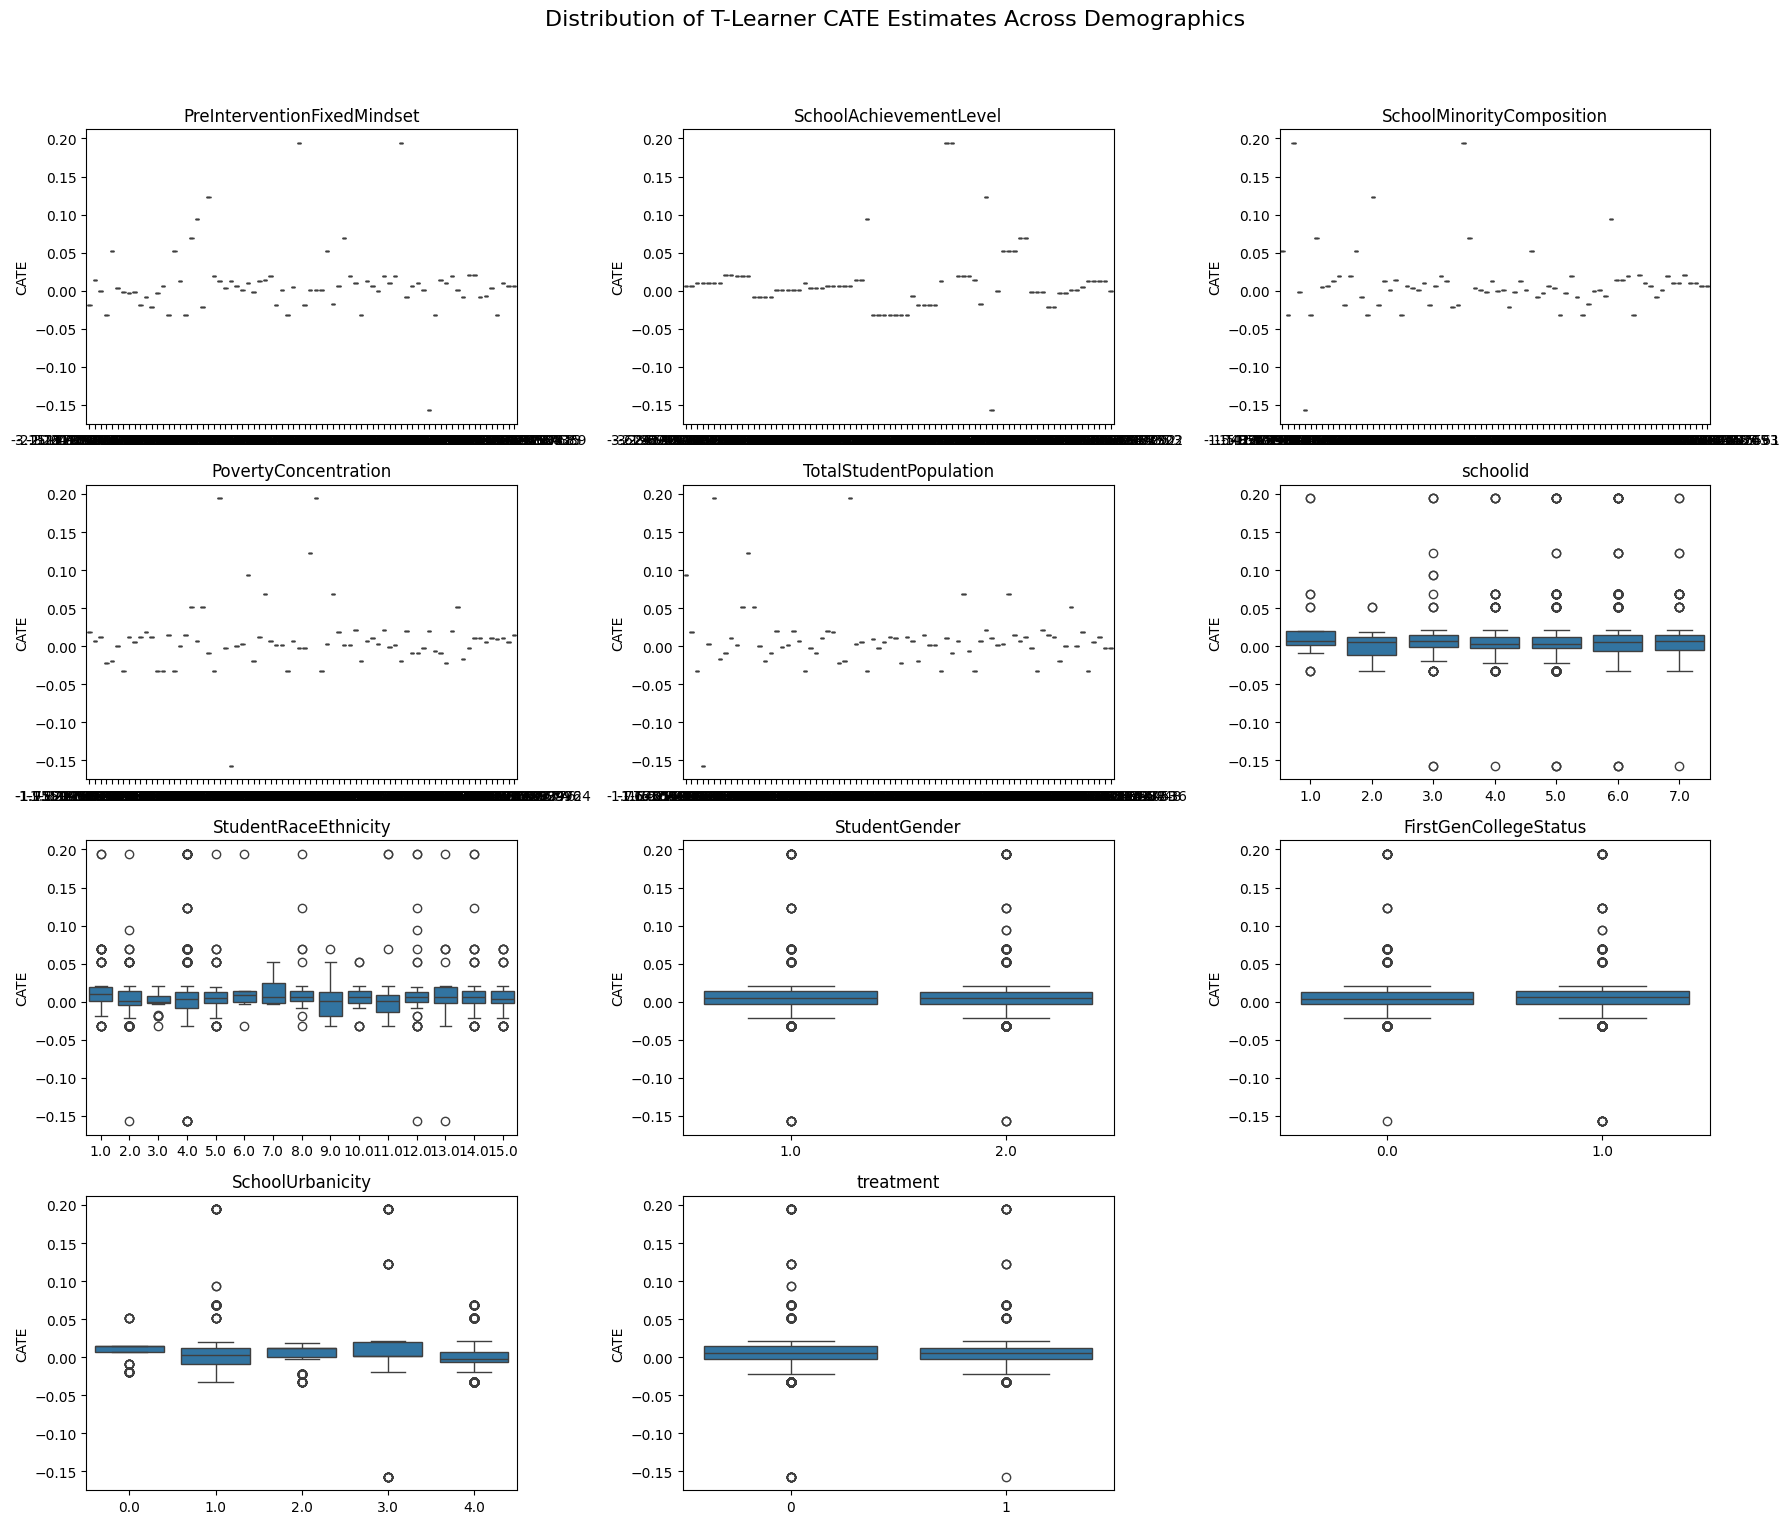

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the T-Learner predictions
t_predictions = pd.read_csv('../../results/analysis_data_results/test_data/t_predictions.csv')

# List of demographic variables
demographics = [
    'PreInterventionFixedMindset', 'SchoolAchievementLevel', 'SchoolMinorityComposition', 
    'PovertyConcentration', 'TotalStudentPopulation', 'schoolid', 'StudentRaceEthnicity', 
    'StudentGender', 'FirstGenCollegeStatus', 'SchoolUrbanicity', 'treatment'
]

# Set up the plotting
num_plots = len(demographics)
num_cols = 3  # Number of columns in the subplot array
num_rows = (num_plots + num_cols - 1) // num_cols  # Compute the necessary number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4), squeeze=False)
fig.suptitle('Distribution of T-Learner CATE Estimates Across Demographics', fontsize=16)

# Create a boxplot for each demographic
for i, demographic in enumerate(demographics):
    ax = axes[i // num_cols, i % num_cols]  # Determine the position in the grid
    sns.boxplot(ax=ax, x=demographic, y='t_CATE', data=t_predictions)
    ax.set_title(demographic)
    ax.set_xlabel('')
    ax.set_ylabel('CATE')
    # Optional: Adjust y-limits if ranges are very different
    # ax.set_ylim(-0.1, 0.1)

# Hide any unused axes
for j in range(i + 1, num_rows * num_cols):
    axes[j // num_cols, j % num_cols].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


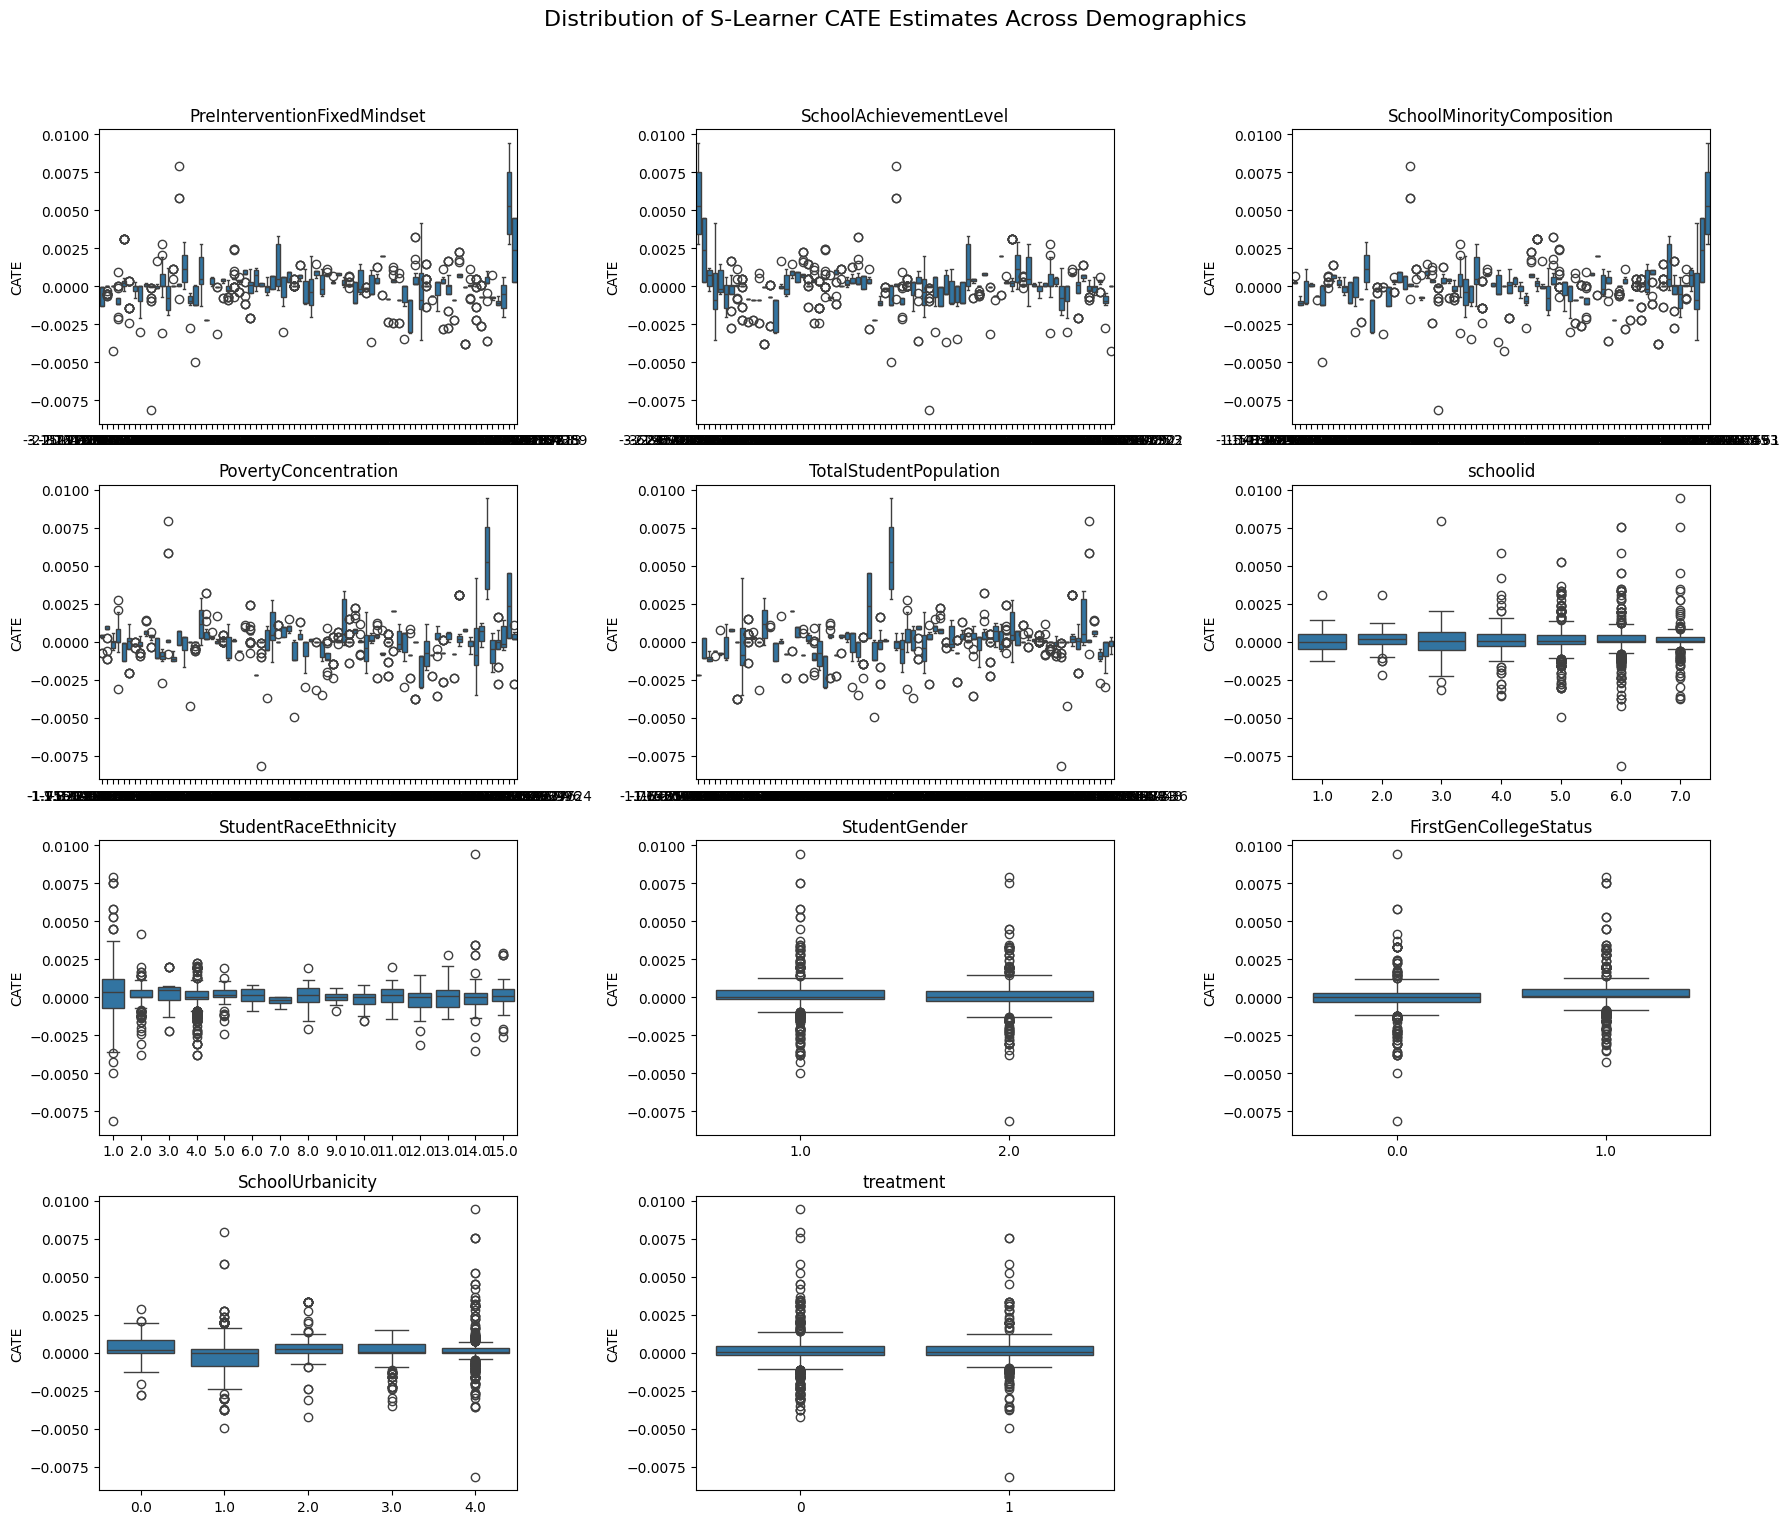

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of demographic variables
demographics = [
    'PreInterventionFixedMindset', 'SchoolAchievementLevel', 'SchoolMinorityComposition', 
    'PovertyConcentration', 'TotalStudentPopulation', 'schoolid', 'StudentRaceEthnicity', 
    'StudentGender', 'FirstGenCollegeStatus', 'SchoolUrbanicity', 'treatment'
]

# Set up the plotting
num_plots = len(demographics)
num_cols = 3  # Number of columns in the subplot array
num_rows = (num_plots + num_cols - 1) // num_cols  # Compute the necessary number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4), squeeze=False)
fig.suptitle('Distribution of S-Learner CATE Estimates Across Demographics', fontsize=16)

# Create a boxplot for each demographic
for i, demographic in enumerate(demographics):
    ax = axes[i // num_cols, i % num_cols]  # Determine the position in the grid
    sns.boxplot(ax=ax, x=demographic, y='s_CATE', data=s_predictions)
    ax.set_title(demographic)
    ax.set_xlabel('')
    ax.set_ylabel('CATE')
    # Optional: Adjust y-limits if ranges are very different
    # ax.set_ylim(-0.1, 0.1)

# Hide any unused axes
for j in range(i + 1, num_rows * num_cols):
    axes[j // num_cols, j % num_cols].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


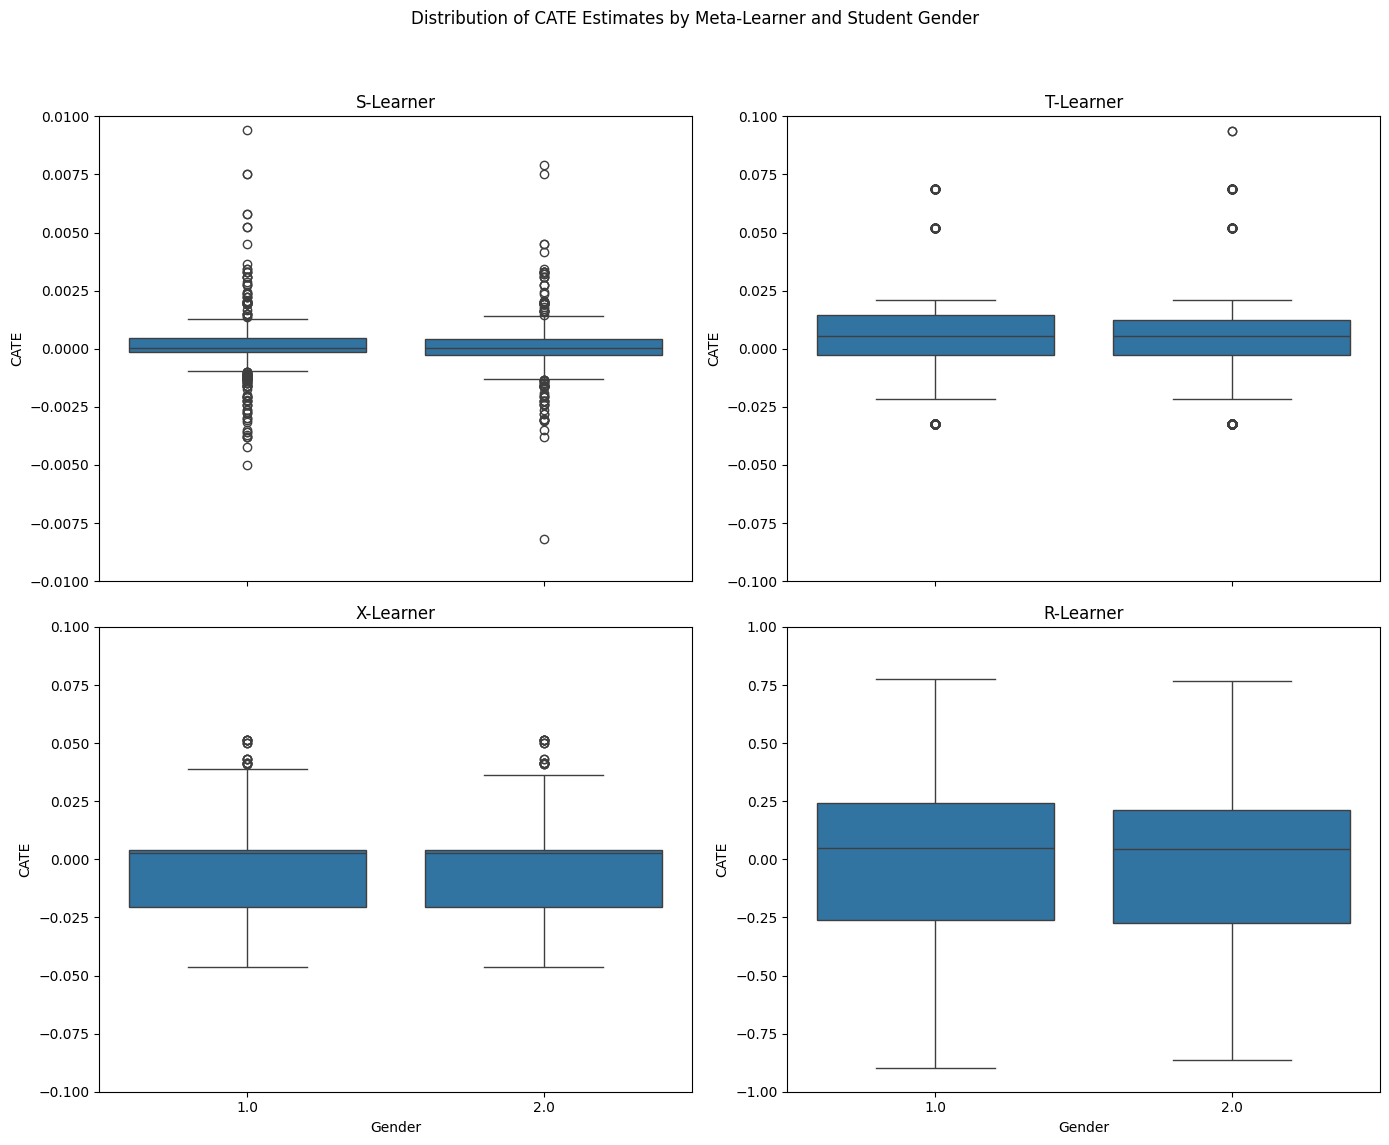

In [11]:


fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True)
fig.suptitle('Distribution of CATE Estimates by Meta-Learner and Student Gender')

# S-Learner
sns.boxplot(ax=axes[0, 0], x='StudentGender', y='s_CATE', data=s_predictions)
axes[0, 0].set_title('S-Learner')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('CATE')
axes[0, 0].set_ylim(-0.01, 0.01)  # Adjust based on observed CATE ranges

# T-Learner
sns.boxplot(ax=axes[0, 1], x='StudentGender', y='t_CATE', data=t_predictions)
axes[0, 1].set_title('T-Learner')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('CATE')
axes[0, 1].set_ylim(-0.1, 0.1)  # Tighter scale

# X-Learner
sns.boxplot(ax=axes[1, 0], x='StudentGender', y='x_CATE', data=x_predictions)
axes[1, 0].set_title('X-Learner')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('CATE')
axes[1, 0].set_ylim(-0.1, 0.1)

# R-Learner
sns.boxplot(ax=axes[1, 1], x='StudentGender', y='r_CATE', data=r_predictions)
axes[1, 1].set_title('R-Learner')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('CATE')
axes[1, 1].set_ylim(-1, 1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


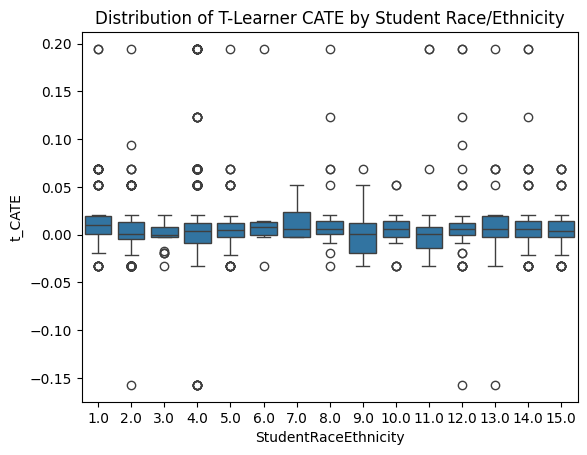

In [13]:
# Assuming 'StudentRaceEthnicity' as a subgroup
sns.boxplot(x='StudentRaceEthnicity', y='t_CATE', data=t_predictions)
plt.title('Distribution of T-Learner CATE by Student Race/Ethnicity')
plt.show()

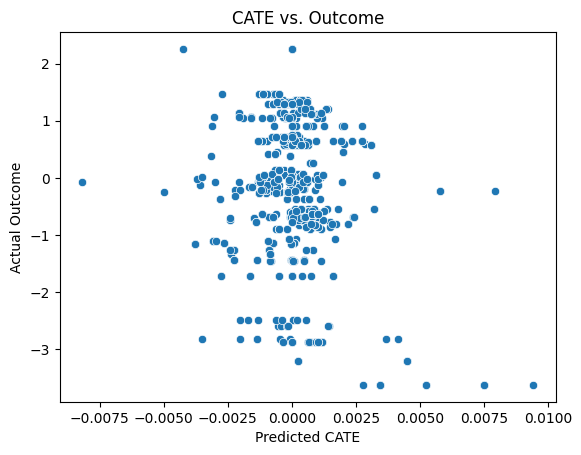

In [14]:
# Assuming outcome variable 'Outcome' exists in your original data
sns.scatterplot(x=s_predictions['s_CATE'], y=s_predictions['SchoolAchievementLevel'])
plt.title('CATE vs. Outcome')
plt.xlabel('Predicted CATE')
plt.ylabel('Actual Outcome')
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths for predictions
file_paths = {
    's_CATE': '../../results/analysis_data_results/test_data/s_predictions.csv',
    't_CATE': '../../results/analysis_data_results/test_data/t_predictions.csv',
    'x_CATE': '../../results/analysis_data_results/test_data/x_predictions.csv',
    'r_CATE': '../../results/analysis_data_results/test_data/r_predictions.csv'
}

# Load predictions from all meta-learners
meta_learner_dfs = []
for learner, path in file_paths.items():
    df = pd.read_csv(path)
    df['MetaLearner'] = learner
    meta_learner_dfs.append(df)

# Combine all meta-learner predictions into one DataFrame
combined_data = pd.concat(meta_learner_dfs, ignore_index=True)

# Columns to group by for visualization
categorical_columns = ['schoolid', 'StudentRaceEthnicity', 'StudentGender', 'FirstGenCollegeStatus', 'SchoolUrbanicity']
continuous_columns = ['PreInterventionFixedMindset', 'SchoolAchievementLevel', 'SchoolMinorityComposition',
                      'PovertyConcentration', 'TotalStudentPopulation']


combined_data.head()

,PreInterventionFixedMindset,SchoolAchievementLevel,SchoolMinorityComposition,PovertyConcentration,TotalStudentPopulation,schoolid,StudentRaceEthnicity,StudentGender,FirstGenCollegeStatus,SchoolUrbanicity,treatment,s_CATE,MetaLearner,t_CATE,x_CATE,r_CATE
0,-0.439024,0.638664,-0.447305,-0.134067,0.197014,7.0,13.0,1.0,1.0,1.0,0,0.002753,s_CATE,NaN,NaN,NaN
1,-0.509044,-0.245513,-1.275983,-0.005205,-1.004449,5.0,4.0,2.0,0.0,1.0,1,-0.001241,s_CATE,NaN,NaN,NaN
2,-0.214474,1.362762,-1.056557,-1.082470,0.348322,6.0,4.0,2.0,1.0,2.0,0,0.000319,s_CATE,NaN,NaN,NaN
3,-0.326688,1.290629,-0.763398,-1.160290,0.831021,6.0,1.0,2.0,0.0,2.0,1,-0.000936,s_CATE,NaN,NaN,NaN
4,0.254433,-0.187237,1.333675,-0.307735,0.375201,5.0,2.0,2.0,1.0,4.0,0,0.000013,s_CATE,NaN,NaN,NaN


In [16]:
def visualize_cate_by_category(data, cate_columns, category_col, meta_learners, title_prefix="CATE by Category"):
    """
    Visualize the CATE for treated and control groups for each meta-learner by category, 
    with each meta-learner in its own subplot.
    
    Parameters:
    - data: DataFrame containing CATE, category, and treatment data.
    - cate_columns: List of column names representing the CATE for each meta-learner.
    - category_col: Column name representing the categorical variable.
    - meta_learners: List of meta-learner names corresponding to cate_columns.
    - title_prefix: Title prefix for the plots.
    """
    num_meta_learners = len(meta_learners)
    plt.figure(figsize=(16, 10))
    
    for i, (cate_col, meta_learner) in enumerate(zip(cate_columns, meta_learners), start=1):
        plt.subplot(2, 2, i)  # Adjust layout as 2 rows and 2 columns for 4 graphs
        sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
        plt.title(f"{title_prefix}: {meta_learner}")
        plt.xticks(rotation=45)
        plt.xlabel(category_col)
        plt.ylabel("Average CATE")
        plt.legend(title="Group", loc="upper right")
    
    plt.tight_layout()
    plt.show()


In [17]:
def visualize_cate_by_continuous(data, cate_columns, continuous_col, meta_learners, title_prefix="CATE by Continuous Variable"):
    """
    Visualize the CATE for treated and control groups for each meta-learner by a continuous variable,
    with each meta-learner in its own subplot.

    Parameters:
    - data: DataFrame containing CATE, continuous variable, and treatment data.
    - cate_columns: List of column names representing the CATE for each meta-learner.
    - continuous_col: Column name representing the continuous variable.
    - meta_learners: List of meta-learner names corresponding to cate_columns.
    - title_prefix: Title prefix for the plots.
    """
    num_meta_learners = len(meta_learners)
    plt.figure(figsize=(16, 10))
    
    for i, (cate_col, meta_learner) in enumerate(zip(cate_columns, meta_learners), start=1):
        plt.subplot(2, 2, i)  # Adjust layout as 2 rows and 2 columns for 4 graphs
        sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
        plt.title(f"{title_prefix}: {meta_learner}")
        plt.xlabel(continuous_col)
        plt.ylabel("CATE")
        plt.legend(title="Group", loc="best")
    
    plt.tight_layout()
    plt.show()


In [18]:
# List of CATE columns and corresponding meta-learners
cate_columns = ["s_CATE", "t_CATE", "x_CATE","r_CATE"] 
meta_learners = ["S-Learner", "T-Learner", "X-Learner","R-Learner"] 

combined_data.head()


,PreInterventionFixedMindset,SchoolAchievementLevel,SchoolMinorityComposition,PovertyConcentration,TotalStudentPopulation,schoolid,StudentRaceEthnicity,StudentGender,FirstGenCollegeStatus,SchoolUrbanicity,treatment,s_CATE,MetaLearner,t_CATE,x_CATE,r_CATE
0,-0.439024,0.638664,-0.447305,-0.134067,0.197014,7.0,13.0,1.0,1.0,1.0,0,0.002753,s_CATE,NaN,NaN,NaN
1,-0.509044,-0.245513,-1.275983,-0.005205,-1.004449,5.0,4.0,2.0,0.0,1.0,1,-0.001241,s_CATE,NaN,NaN,NaN
2,-0.214474,1.362762,-1.056557,-1.082470,0.348322,6.0,4.0,2.0,1.0,2.0,0,0.000319,s_CATE,NaN,NaN,NaN
3,-0.326688,1.290629,-0.763398,-1.160290,0.831021,6.0,1.0,2.0,0.0,2.0,1,-0.000936,s_CATE,NaN,NaN,NaN
4,0.254433,-0.187237,1.333675,-0.307735,0.375201,5.0,2.0,2.0,1.0,4.0,0,0.000013,s_CATE,NaN,NaN,NaN


C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)


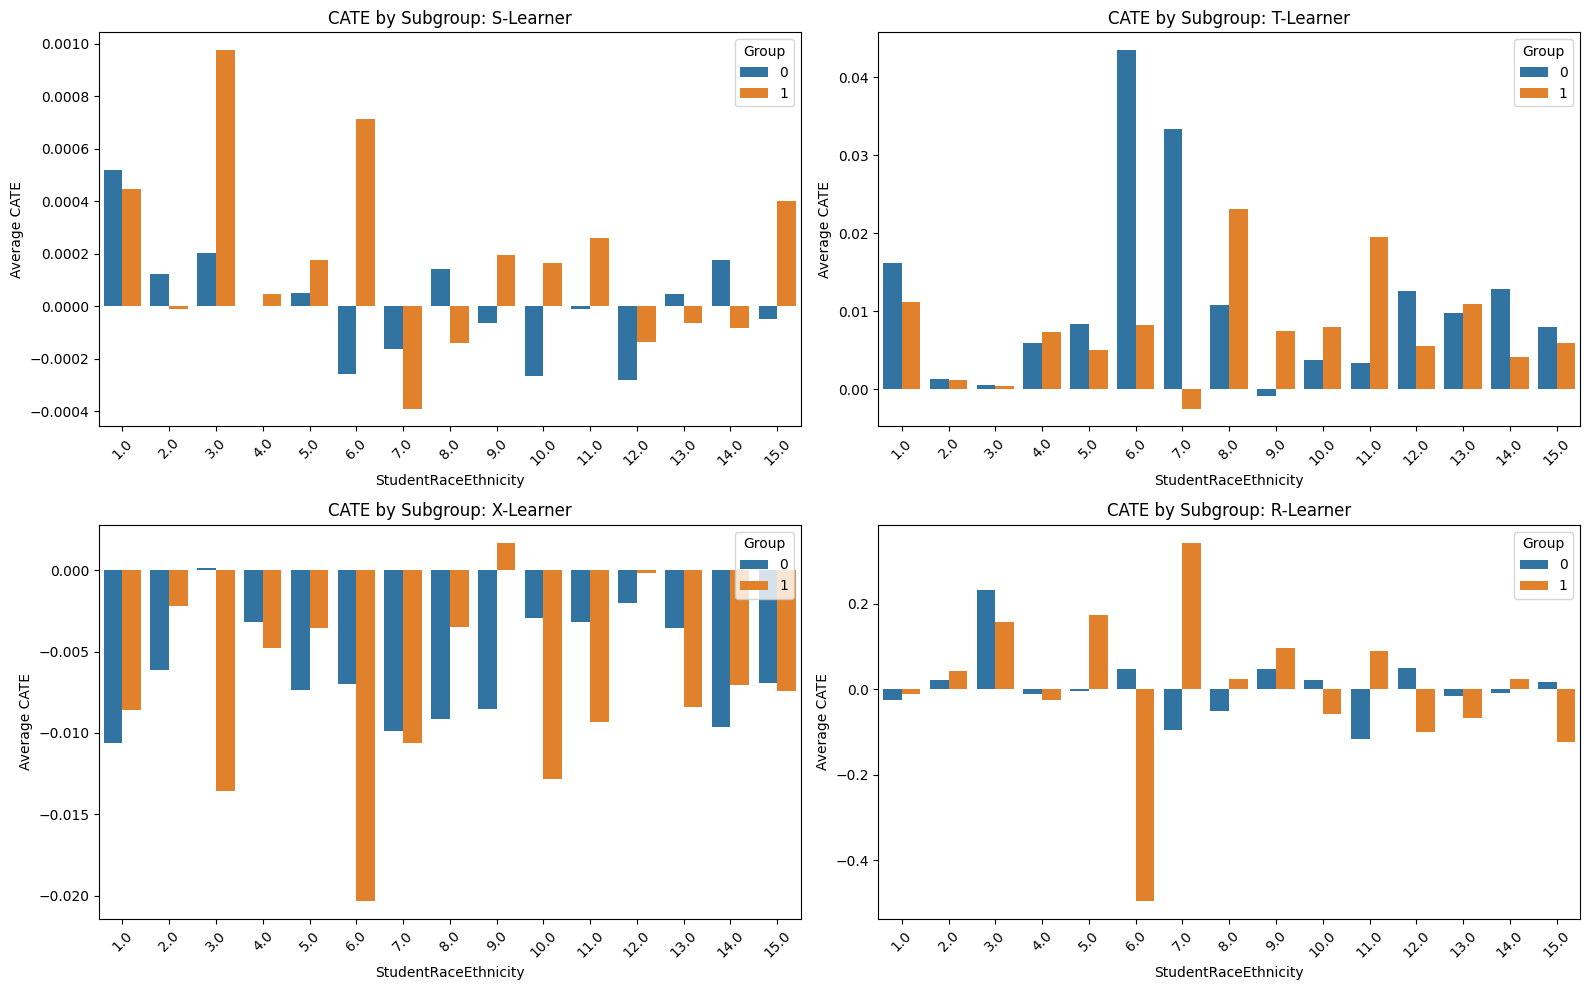

In [19]:
# Loop over each categorical variable StudentRaceEthnicity
visualize_cate_by_category(combined_data, cate_columns, 'StudentRaceEthnicity', meta_learners, title_prefix="CATE by Subgroup")

C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)


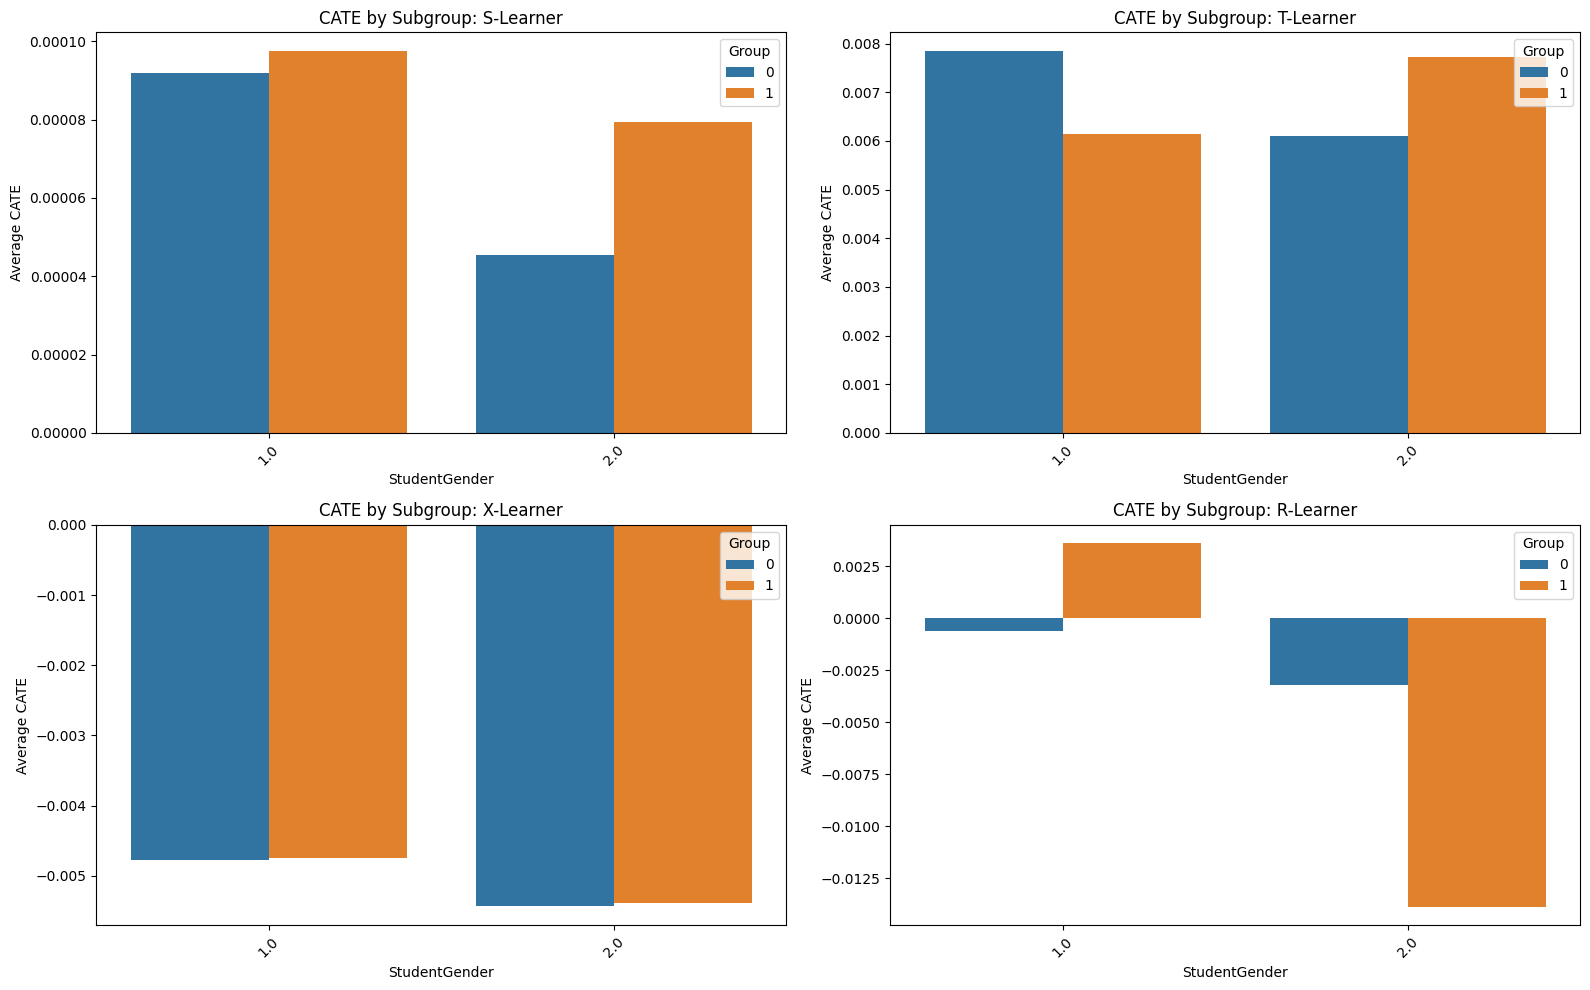

In [20]:
# Loop over each categorical variable StudentGender
visualize_cate_by_category(combined_data, cate_columns, 'StudentGender', meta_learners, title_prefix="CATE by Subgroup")

C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)


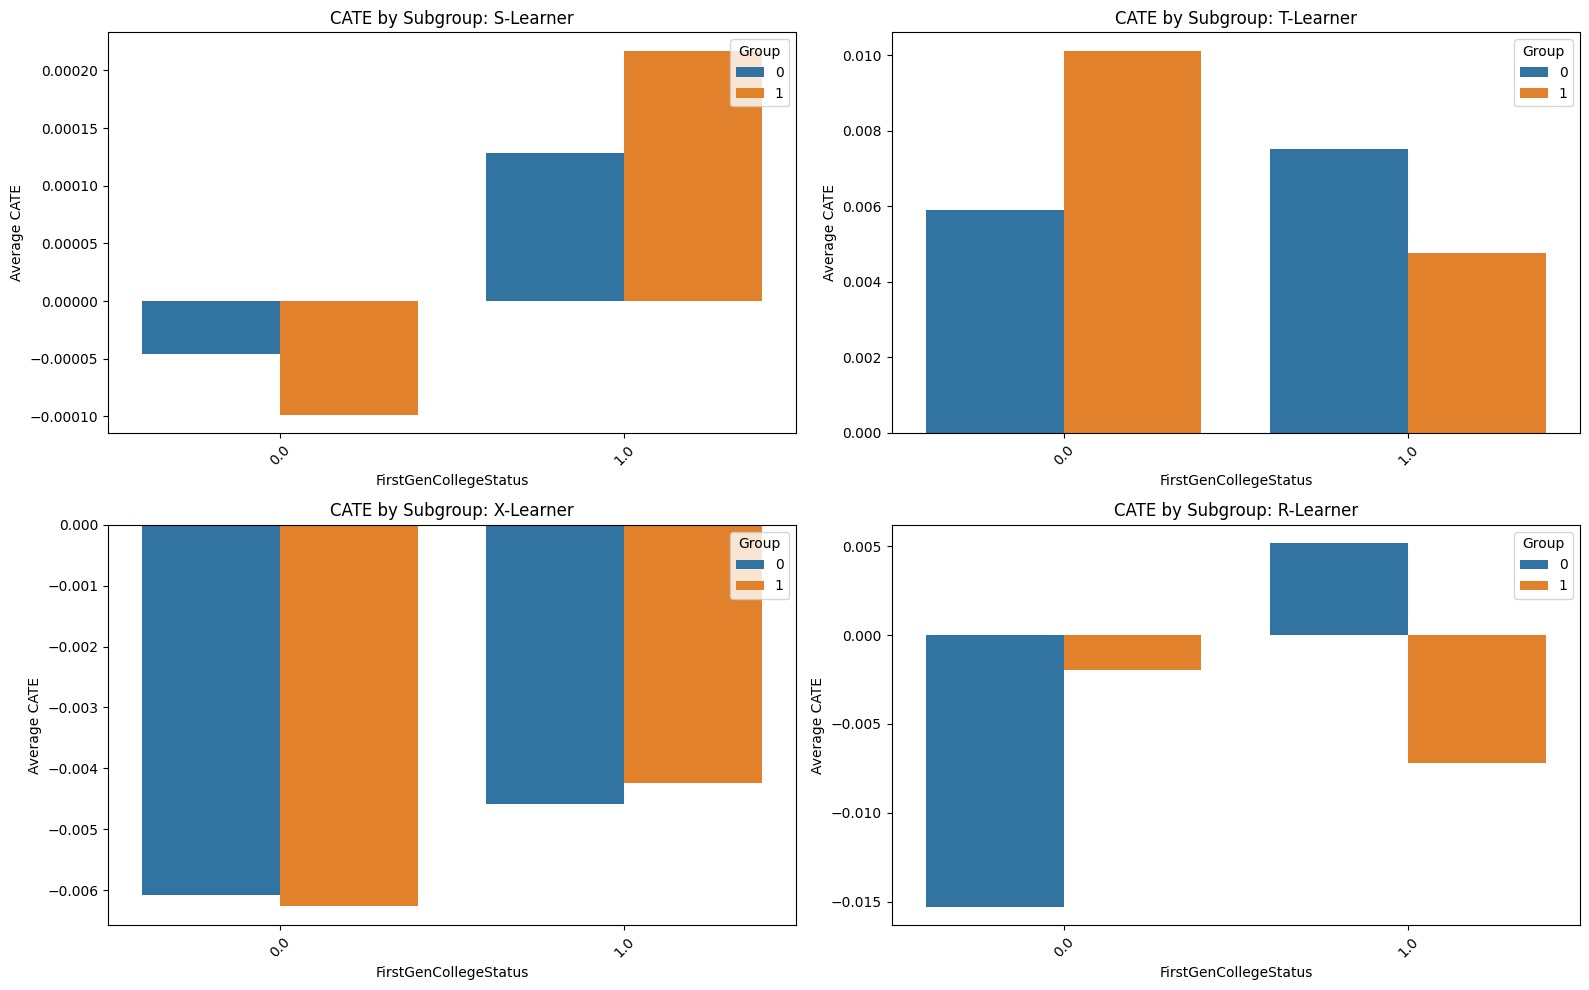

In [21]:
# Loop over each categorical variable FirstGenCollegeStatus
visualize_cate_by_category(combined_data, cate_columns, 'FirstGenCollegeStatus', meta_learners, title_prefix="CATE by Subgroup")

C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1217676603.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=category_col, y=cate_col, hue="treatment", ci=None)


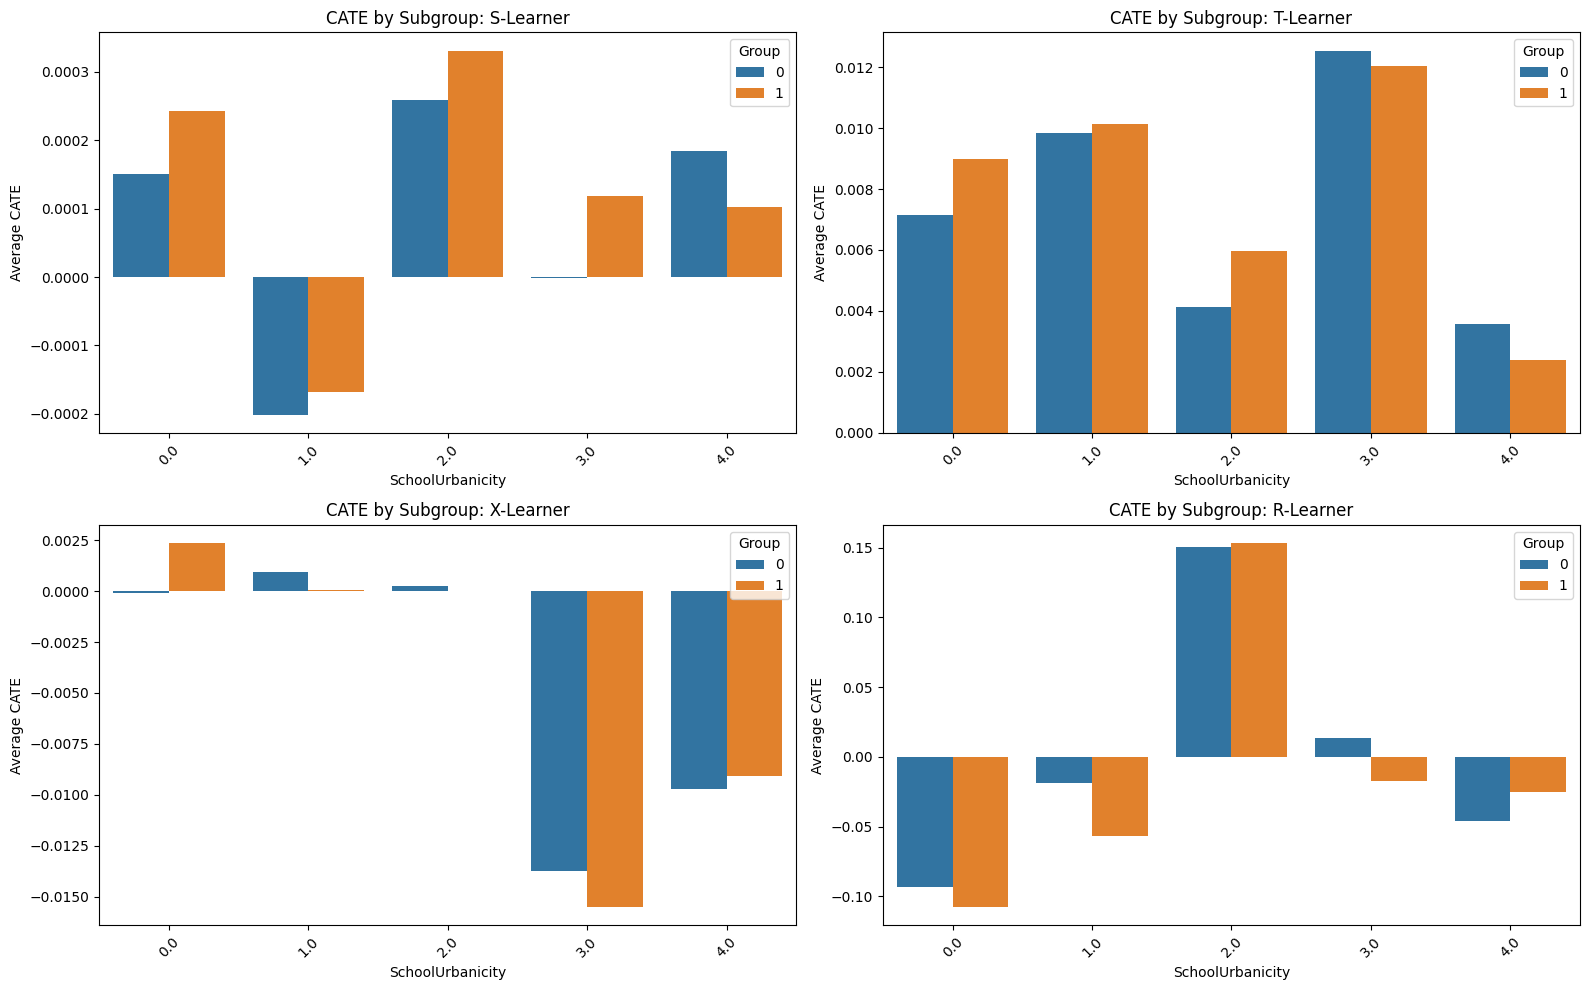

In [24]:
# Loop over each categorical variable SchoolUrbanicity
visualize_cate_by_category(combined_data, cate_columns, 'SchoolUrbanicity', meta_learners, title_prefix="CATE by Subgroup")

C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)


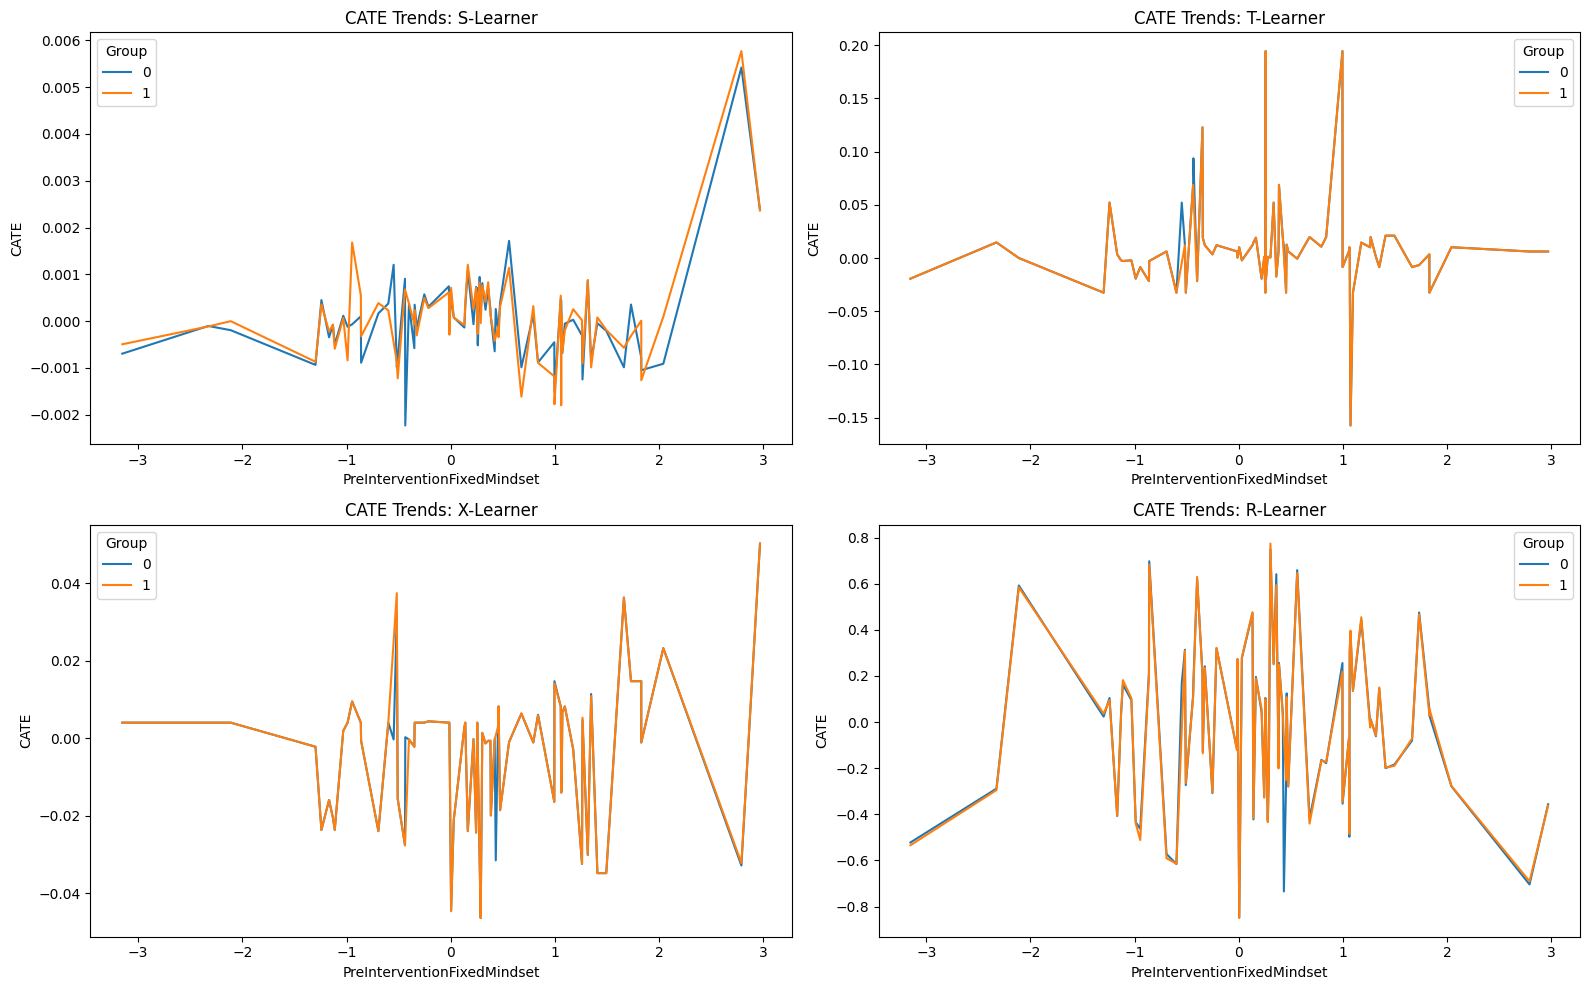

In [25]:
# Loop over each continuous variable PreInterventionFixedMindset
visualize_cate_by_continuous(combined_data, cate_columns, 'PreInterventionFixedMindset', meta_learners, title_prefix="CATE Trends")


C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)


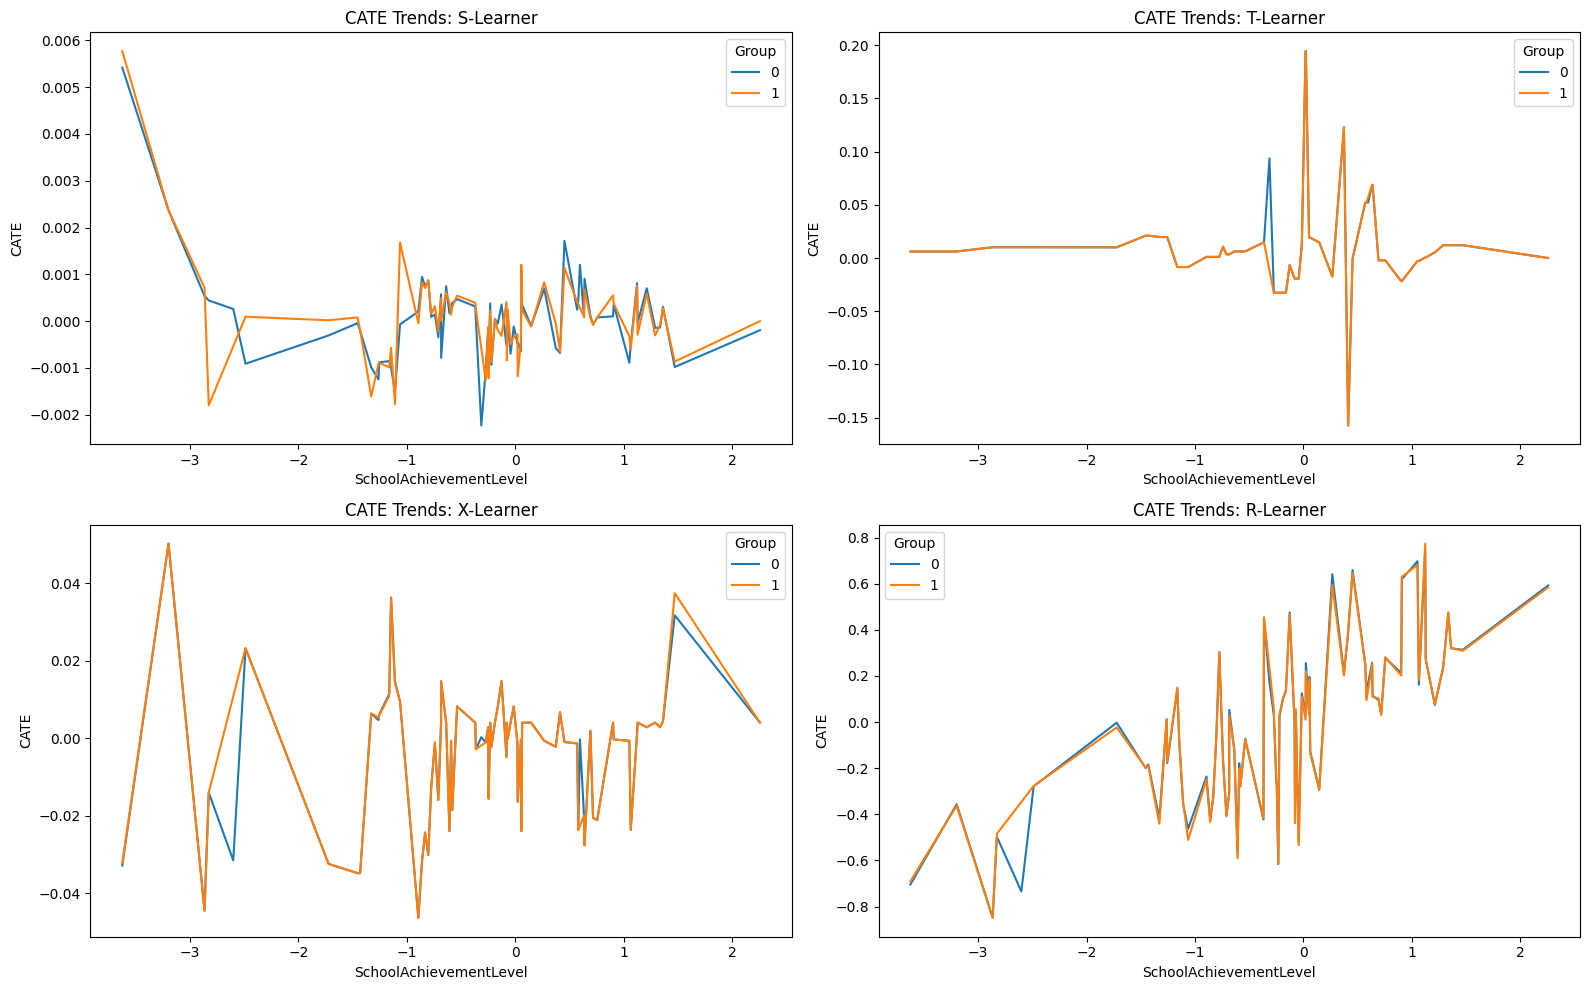

In [26]:
# Loop over each continuous variable SchoolAchievementLevel
visualize_cate_by_continuous(combined_data, cate_columns, 'SchoolAchievementLevel', meta_learners, title_prefix="CATE Trends")


C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)


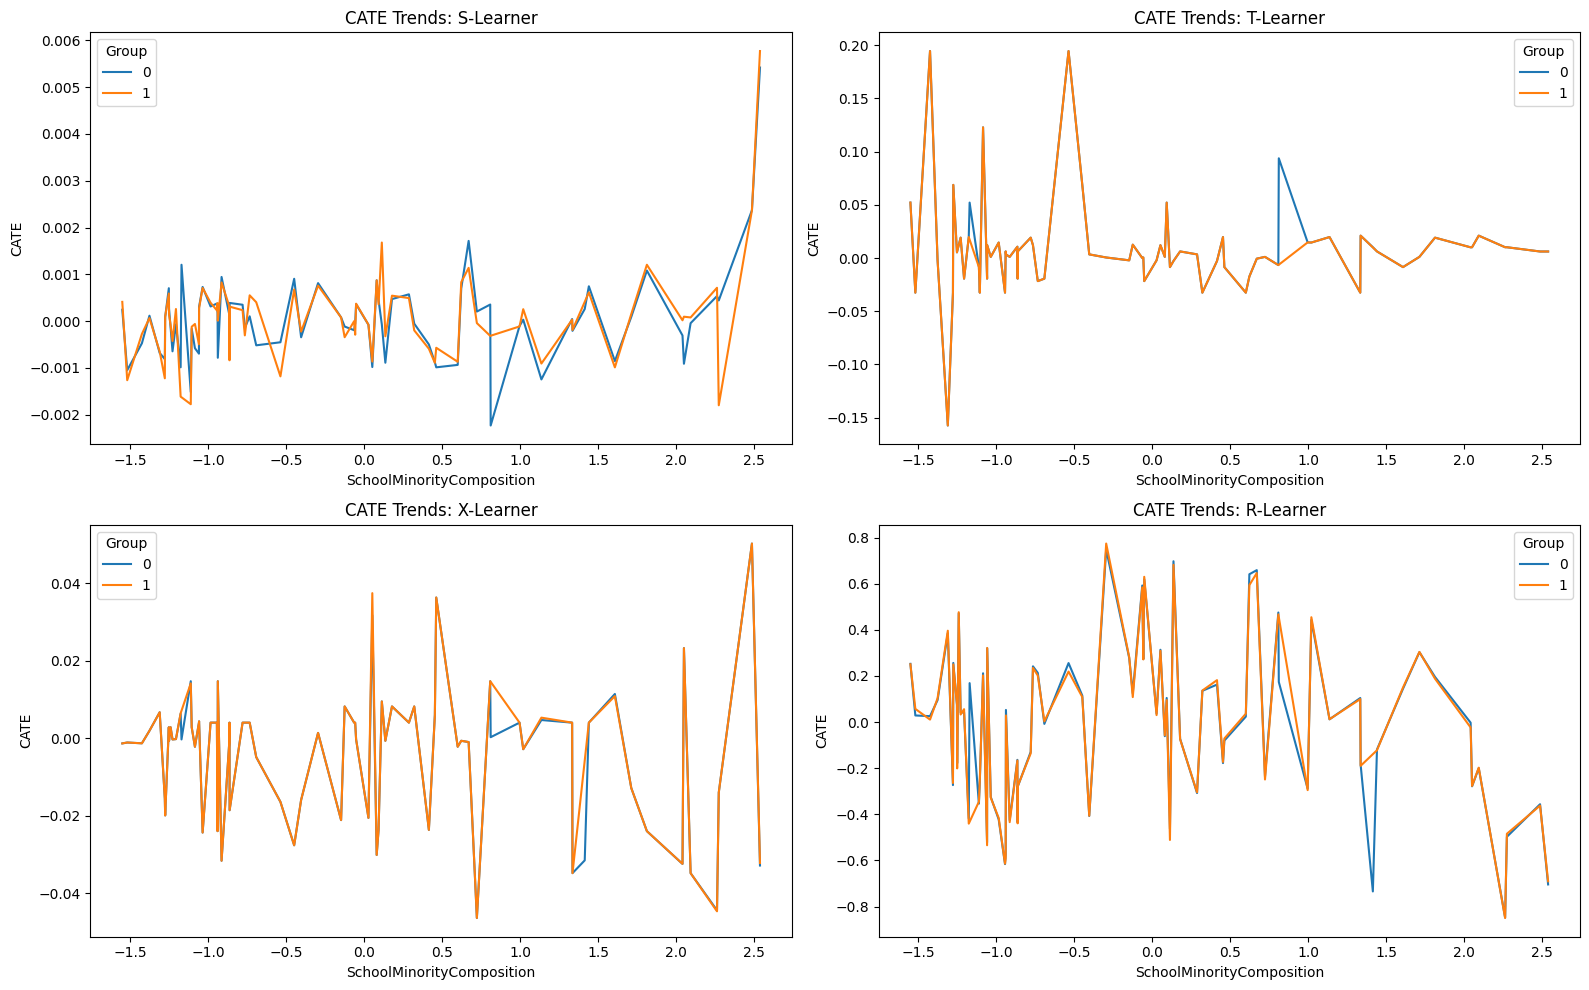

In [27]:
# Loop over each continuous variable SchoolMinorityComposition
visualize_cate_by_continuous(combined_data, cate_columns, 'SchoolMinorityComposition', meta_learners, title_prefix="CATE Trends")


C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)


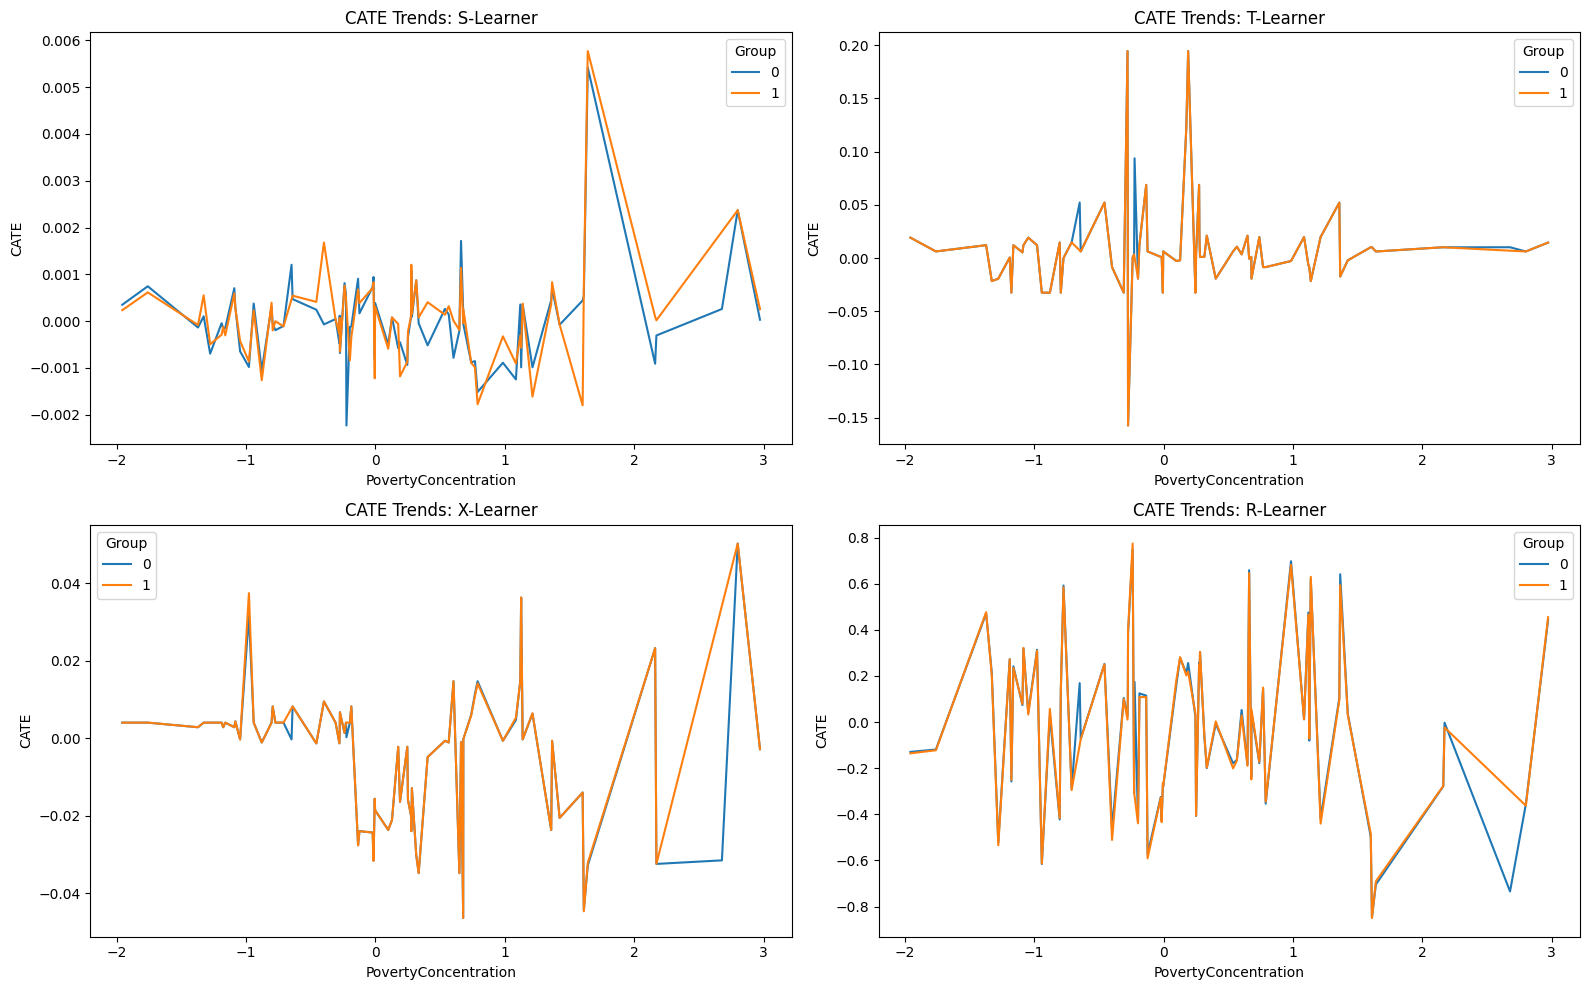

In [28]:
# Loop over each continuous variable PovertyConcentration
visualize_cate_by_continuous(combined_data, cate_columns, 'PovertyConcentration', meta_learners, title_prefix="CATE Trends")


C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1390729620.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x=continuous_col, y=cate_col, hue="treatment", ci=None)


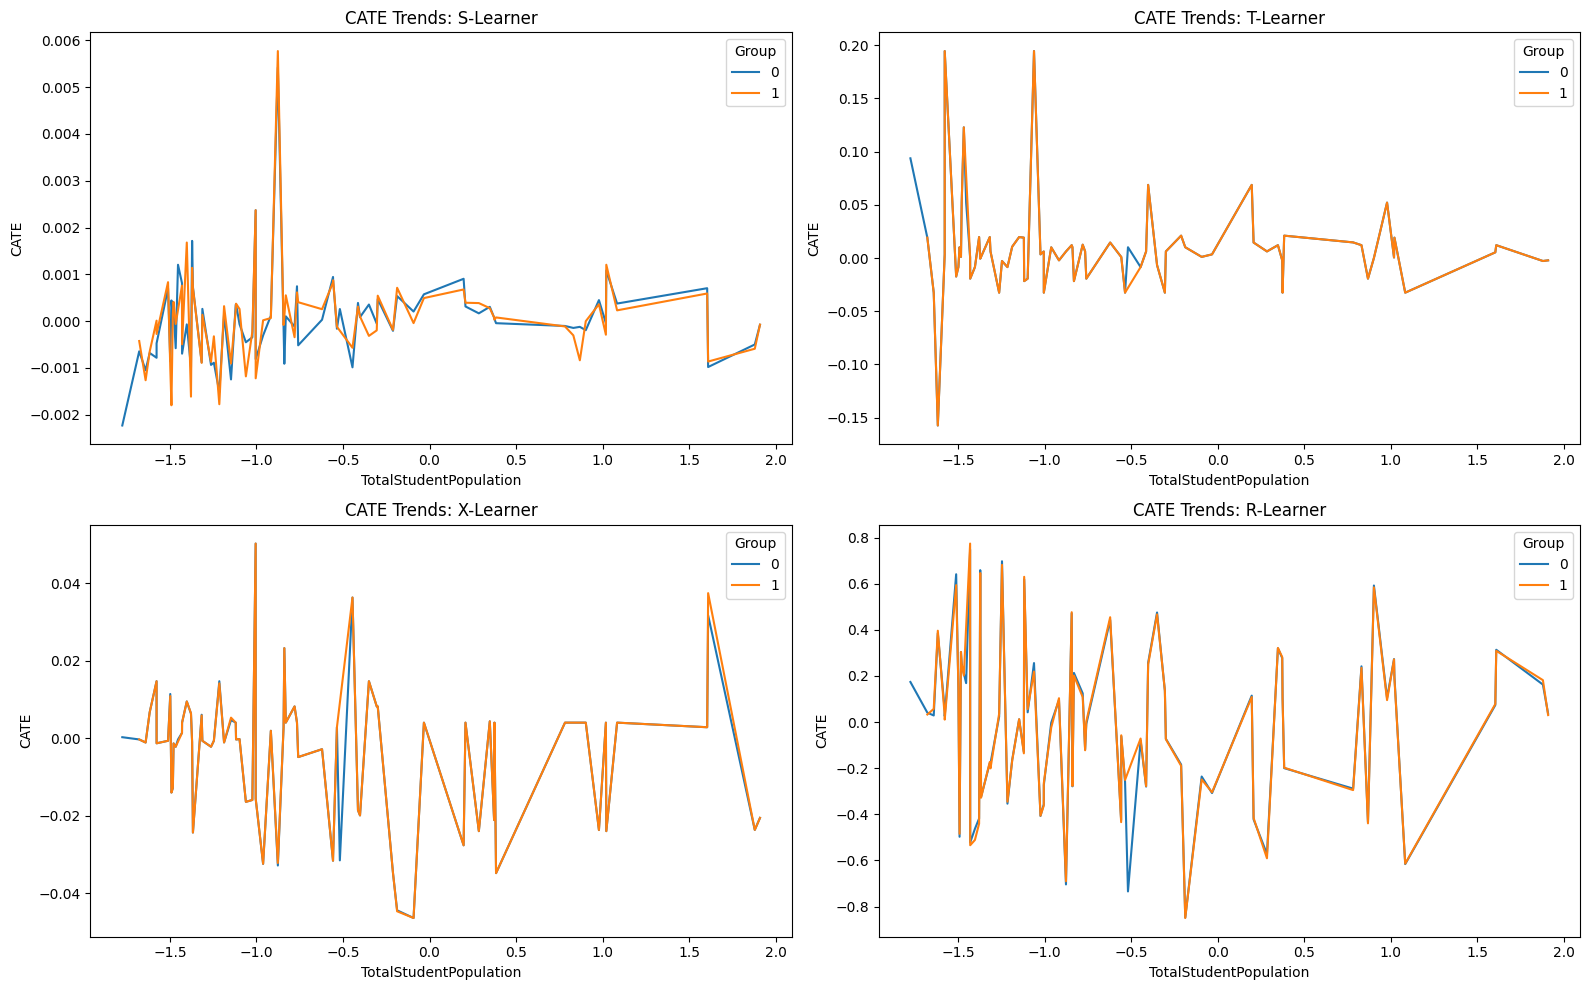

In [29]:
# Loop over each continuous variable TotalStudentPopulation
visualize_cate_by_continuous(combined_data, cate_columns, 'TotalStudentPopulation', meta_learners, title_prefix="CATE Trends")


In [30]:
# 4. Focused Key Comparisons
def plot_key_comparisons(data, cate_columns, group_col, key_covariates, meta_learners, title_prefix="Key CATE Comparisons"):
    """
    Focus on key comparisons for selected meta-learners and covariates.
    """
    num_covariates = len(key_covariates)
    num_meta_learners = len(meta_learners)
    plt.figure(figsize=(16, num_covariates * 4))
    
    for i, covariate in enumerate(key_covariates):
        for j, (cate_col, meta_learner) in enumerate(zip(cate_columns, meta_learners)):
            plt.subplot(num_covariates, num_meta_learners, i * num_meta_learners + j + 1)
            sns.lineplot(
                data=data,
                x=covariate,
                y=cate_col,
                hue=group_col,
                ci="sd",  # Add confidence intervals
                palette="muted"
            )
            plt.axhline(0, color='red', linestyle='--', label="No Treatment Effect")
            plt.title(f"{meta_learner}: {covariate}")
            plt.xlabel(covariate)
            plt.ylabel("CATE")
    
    plt.tight_layout()
    plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_18652\2019721935.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\2019721935.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\2019721935.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\2019721935.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\2019721935.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(
C:\Users\dell\AppData\Local\Temp\ipykernel_18652\2019721935.py:13: FutureWarning: 

The `ci` parameter is deprecated. Us

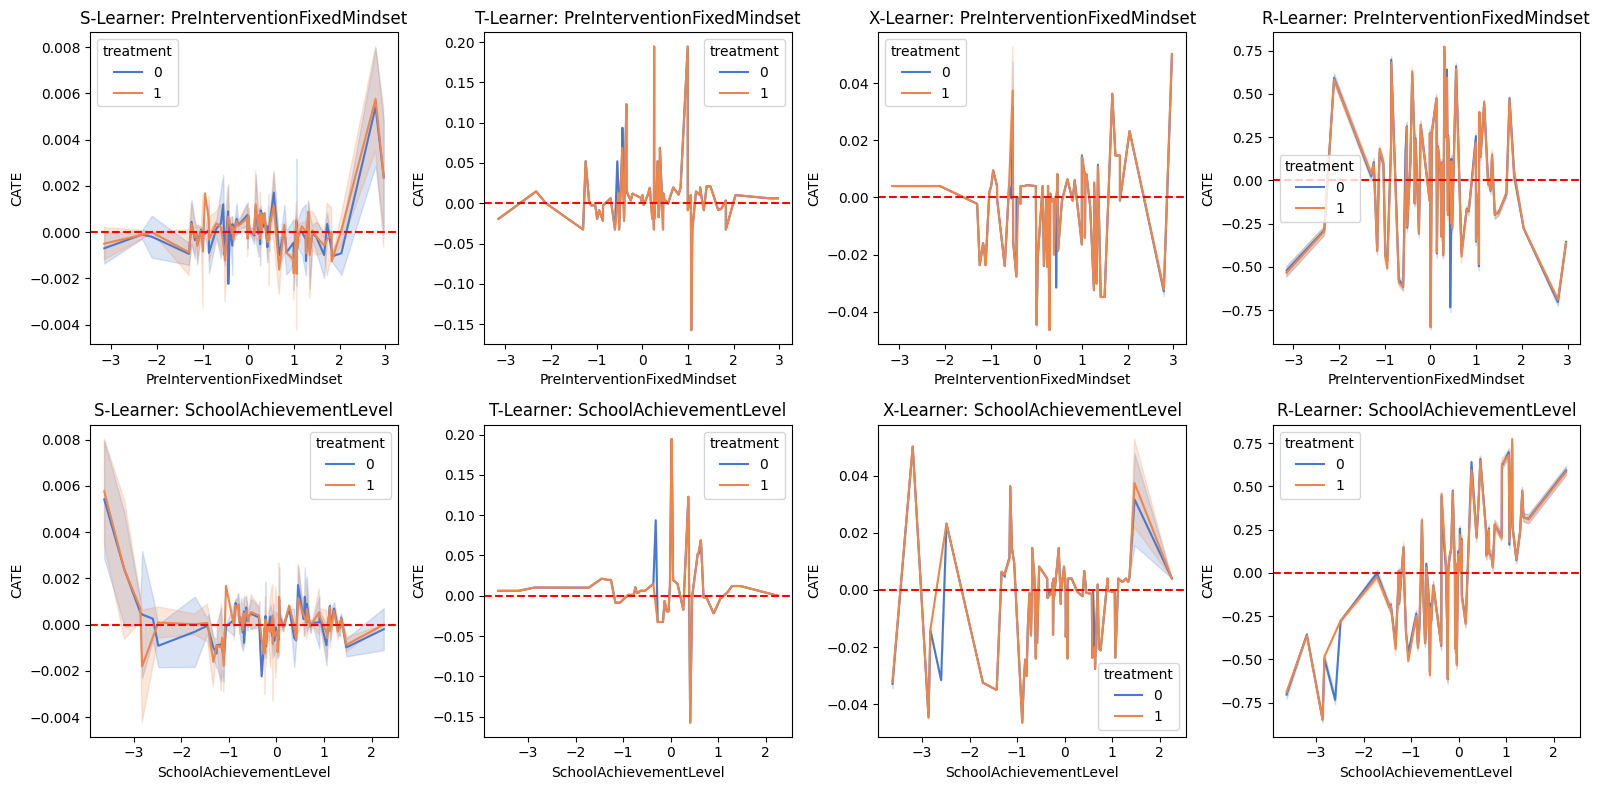

In [31]:

# 4. Plot Key Comparisons
plot_key_comparisons(
    combined_data,
    cate_columns,
    "treatment",
    key_covariates=["PreInterventionFixedMindset", "SchoolAchievementLevel"],
    meta_learners=meta_learners
)

C:\Users\dell\AppData\Local\Temp\ipykernel_18652\1577966311.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="Meta Learner", y="Variance", palette="viridis")


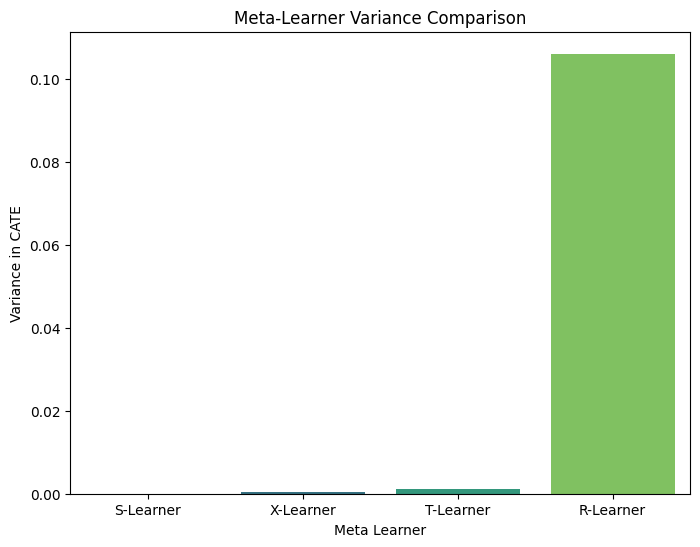

  Meta Learner  Variance
0    S-Learner  0.000001
2    X-Learner  0.000301
1    T-Learner  0.001193
3    R-Learner  0.106047


In [32]:
import numpy as np
def meta_learner_comparison(data, cate_columns, meta_learners):
    """
    Compare variance in treatment effects across meta-learners.

    Parameters:
    - data: DataFrame containing CATE estimates.
    - cate_columns: List of column names representing the CATE for each meta-learner.
    - meta_learners: List of meta-learner names corresponding to cate_columns.
    """
    variances = {meta_learner: np.var(data[cate_col]) for cate_col, meta_learner in zip(cate_columns, meta_learners)}
    comparison_df = pd.DataFrame(list(variances.items()), columns=["Meta Learner", "Variance"])
    comparison_df.sort_values(by="Variance", inplace=True)

    plt.figure(figsize=(8, 6))
    sns.barplot(data=comparison_df, x="Meta Learner", y="Variance", palette="viridis")
    plt.title("Meta-Learner Variance Comparison")
    plt.xlabel("Meta Learner")
    plt.ylabel("Variance in CATE")
    plt.show()

    print(comparison_df)

# Example Usage
meta_learner_comparison(combined_data, cate_columns, meta_learners)


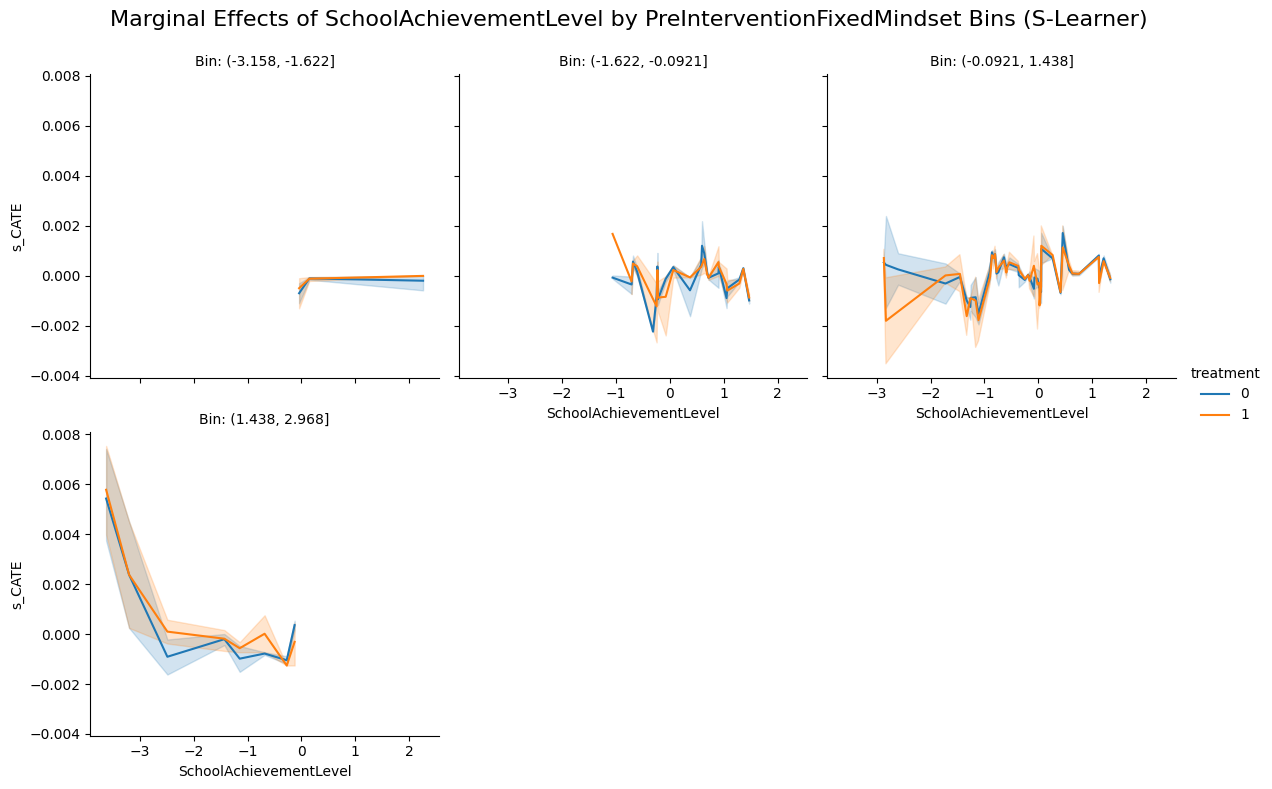

In [33]:
def plot_faceted_line(data, x1, x2, cate_col, meta_learner, group_col="treatment", bins=4):
    """
    Faceted line plot showing marginal effects with treatment and control groups.

    Parameters:
    - data: DataFrame containing the data to plot.
    - x1: The x-axis variable (covariate 1).
    - x2: The variable to create bins for facets (covariate 2).
    - cate_col: The column representing CATE values.
    - meta_learner: The meta-learner name (for title purposes).
    - group_col: The column indicating treatment or control groups (default: "Treatment").
    - bins: Number of bins to divide x2 into for facets.
    """
    data['bin'] = pd.cut(data[x2], bins=bins)
    
    g = sns.FacetGrid(data, col='bin', hue=group_col, col_wrap=3, height=4, sharey=True)
    g.map(sns.lineplot, x1, cate_col)
    g.add_legend(title=group_col)
    g.set_titles("Bin: {col_name}")
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f"Marginal Effects of {x1} by {x2} Bins ({meta_learner})", fontsize=16)
    plt.show()

# Example Usage:
plot_faceted_line(
    combined_data, 
    'SchoolAchievementLevel', 
    'PreInterventionFixedMindset', 
    's_CATE', 
    'S-Learner'
)


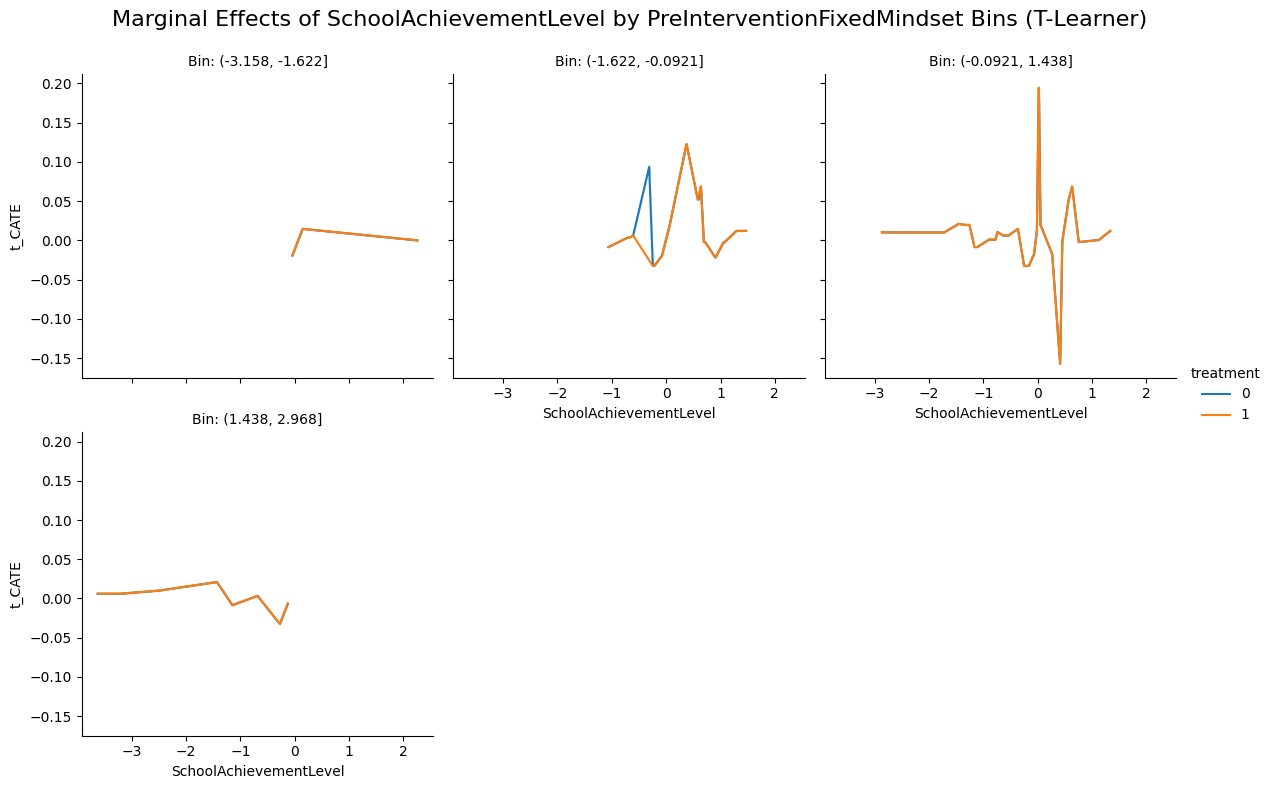

In [34]:
# Example Usage:
plot_faceted_line(
    combined_data, 
    'SchoolAchievementLevel', 
    'PreInterventionFixedMindset', 
    't_CATE', 
    'T-Learner'
)

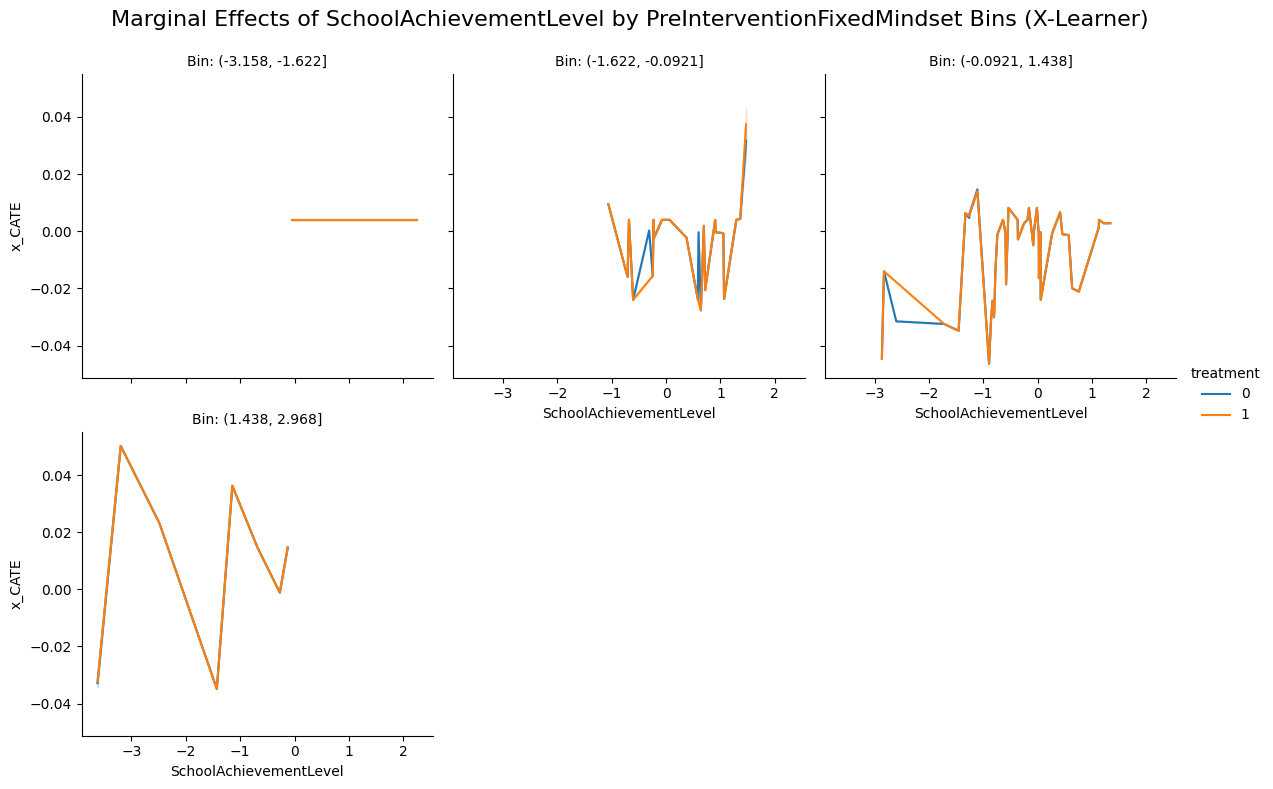

In [35]:
# Example Usage:
plot_faceted_line(
    combined_data, 
    'SchoolAchievementLevel', 
    'PreInterventionFixedMindset', 
    'x_CATE', 
    'X-Learner'
)

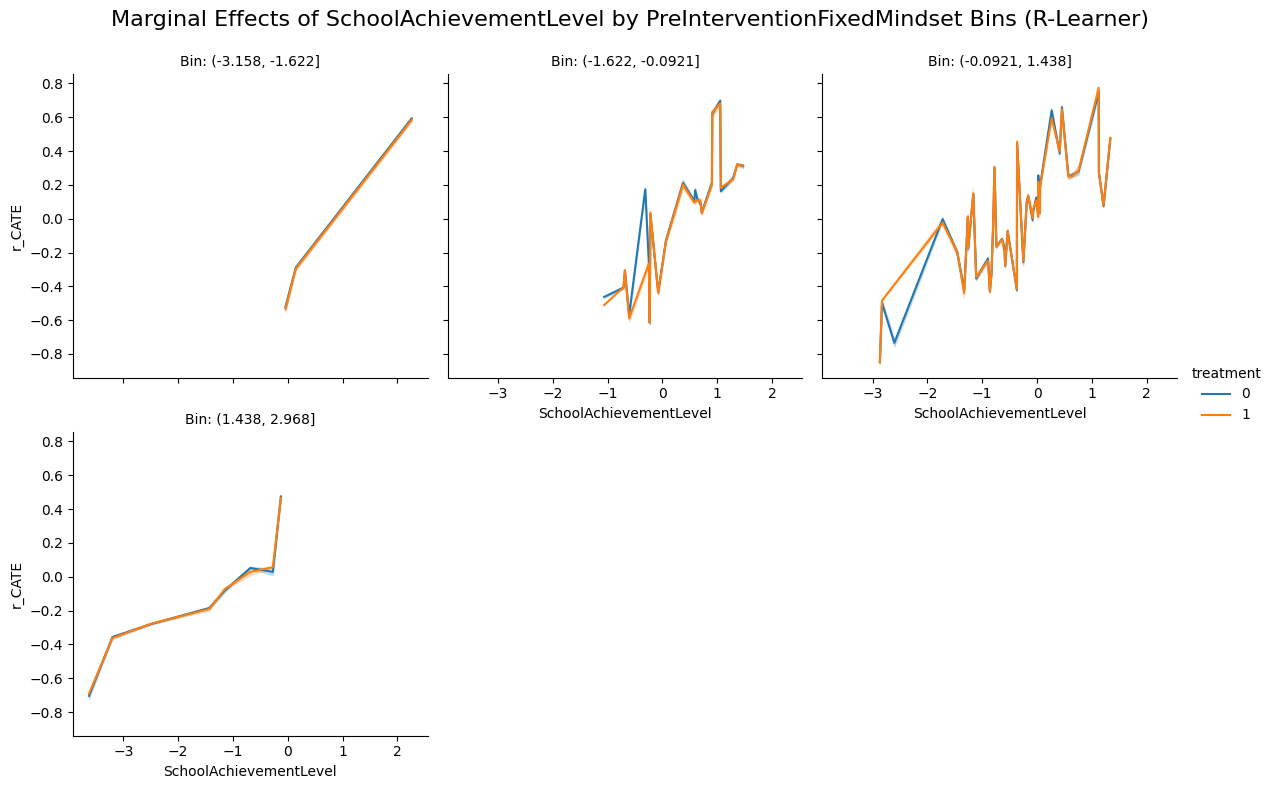

In [36]:
# Example Usage:
plot_faceted_line(
    combined_data, 
    'SchoolAchievementLevel', 
    'PreInterventionFixedMindset', 
    'r_CATE', 
    'R-Learner'
)